## TP1 - Digital Signal Processing


In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import time
import sounddevice


#### 1 Signal generation and sampling

##### 1.1 Signal generation

In [2]:
#1- 
f0 = 2
f1 = 3*f0

def x(t):
    array = np.sin(2*np.pi*f0*t)+np.cos(2*np.pi*f1*t)
    return (array)

[1.         1.01185551 1.022289   ... 0.96349148 0.94828474 0.93207522]


Text(0, 0.5, 'Amplitude')

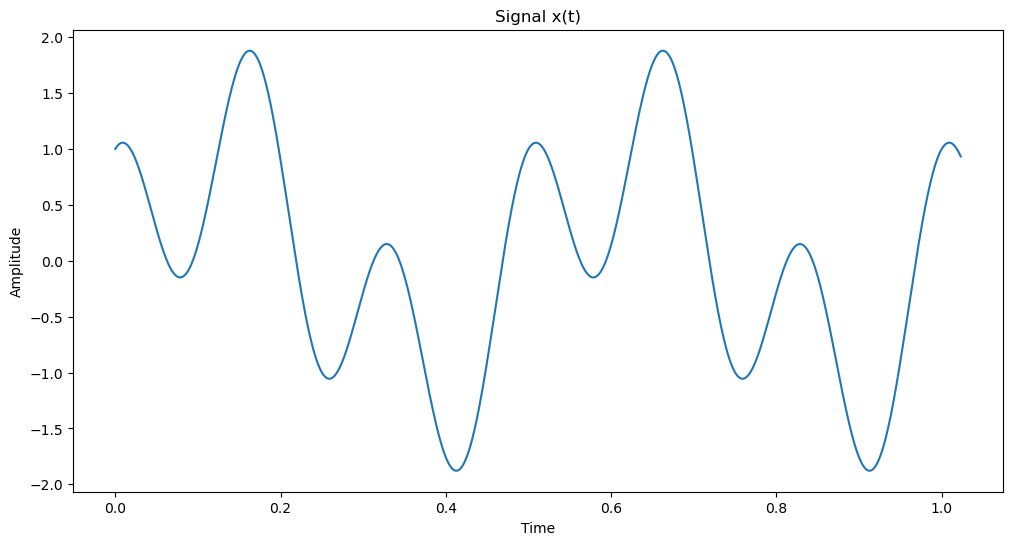

In [3]:
#2-Plotting generated signal
f_s0= 1000
N = 1024

def t0(N,f):
    return np.arange(N)/f
        
t_0 = t0(N,f_s0)
x0 = x(t_0)
print(x0)
plt.figure(figsize=(12, 6))
plt.title("Signal x(t)")
plt.plot(t_0,x0)
plt.xlabel("Time")
plt.ylabel("Amplitude")

In [4]:
#3-
fs= 20
N2 = fs
tn = t0(N2,fs)
xn = x(tn)

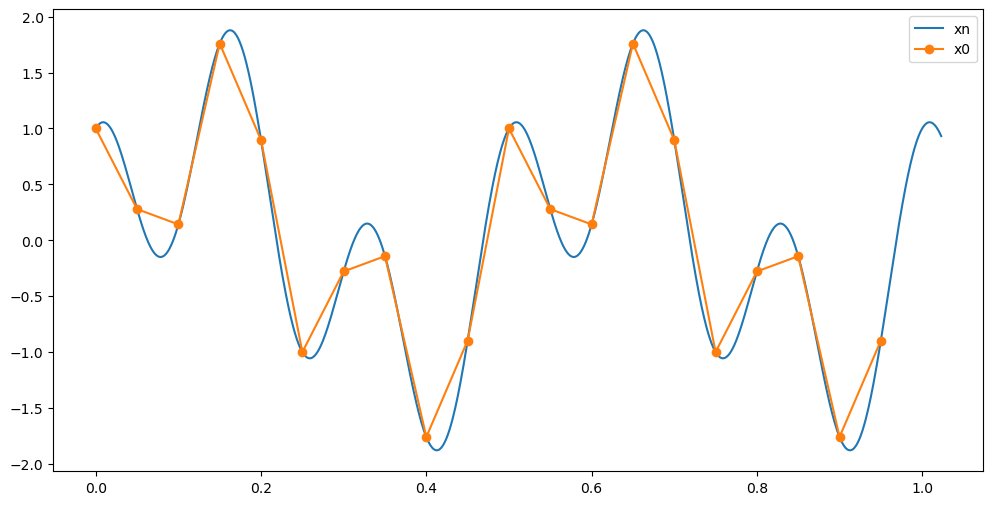

In [5]:
#4-Sampling
plt.figure(figsize=(12, 6))
plt.plot(t_0,x0, label='xn')
plt.plot(tn,xn, '-o', label = 'x0')
plt.legend()
plt.show()

##### 1.2 Signal reconstruction

#1-

For a signal with frequency support $[f_{min}, f_{max}]$ (e.g. $[f_{min} = -f_{max}]$ for a symmetric signal like cosine), the sampling rate should satisfy:
$
f_s \geq 2 \cdot f_{\text{max}}
$
to ensure accurate reconstruction and avoid aliasing.

For the signal in Section 1.1, the minimum sampling rate is:
$
f_s = 2 \cdot f_1 = 12 \, \text{Hz}
$


In [6]:
#2-
def rec_sinc(xs,ts,fs,t):
    return np.sinc((t[:,None]- ts[None,:])*fs).dot(xs)


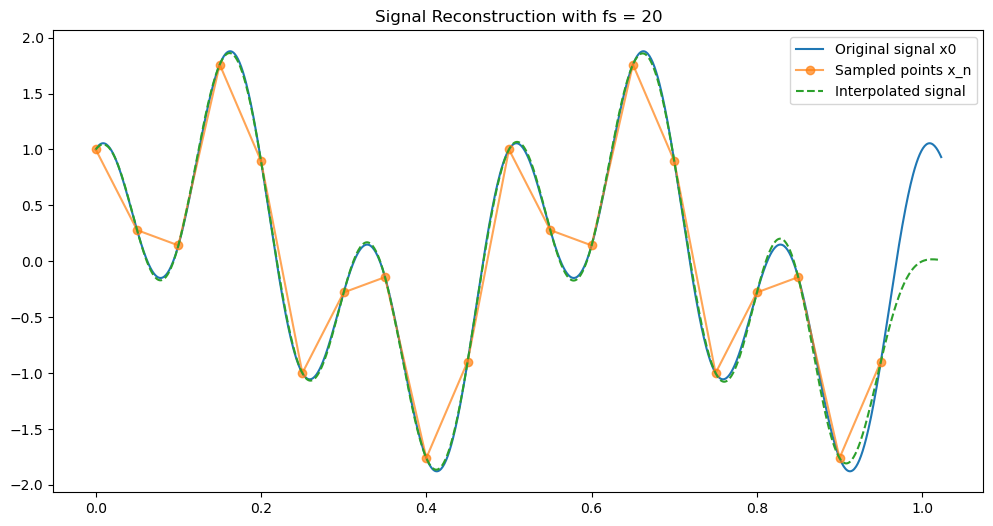

In [7]:
#3-
plt.figure(figsize=(12, 6))
plt.plot(t_0,x0, label = 'Original signal x0')
plt.plot(tn, xn, '-o', label='Sampled points x_n', alpha = 0.7)
plt.plot(t_0, rec_sinc(xn,tn,fs,t_0), label='Interpolated signal', linestyle='--')
plt.title('Signal Reconstruction with fs = 20')
plt.legend()
plt.show()


We observe an edge effect on the border of the sampling window where interpolation becomes less accurate. This is due to the limited number of samples near the edges that is not enough to reconstruct the signal smoothly, because the sinc function extends indefinitely.
By increasing the sampling frequency a more accurate reconstruction at the borders should result

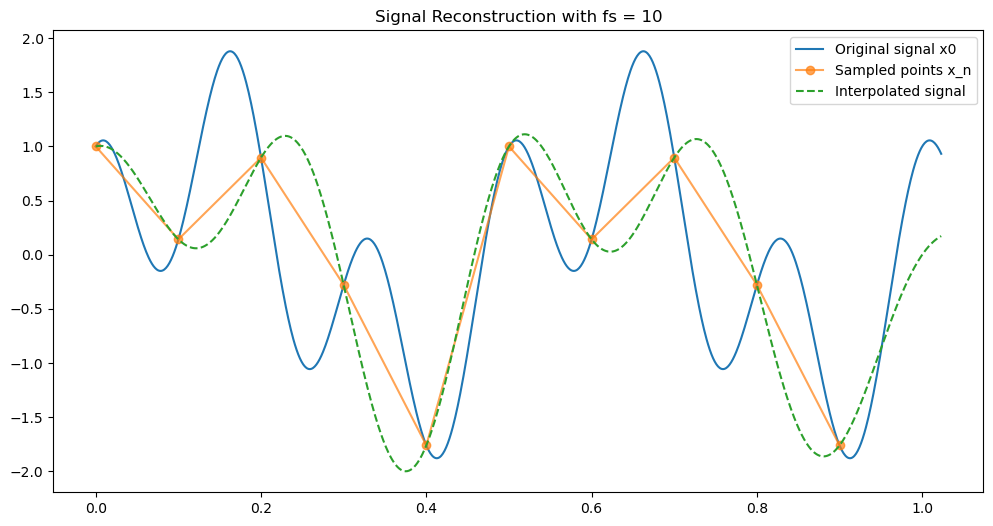

In [8]:
#4-
fs = 10
tn = t0(fs,fs)
xn = x(tn)
plt.figure(figsize=(12, 6))
plt.plot(t_0,x0, label = 'Original signal x0')
plt.plot(tn, xn, '-o', label='Sampled points x_n', alpha = 0.7)
plt.plot(t_0, rec_sinc(xn,tn,fs,t_0), label='Interpolated signal', linestyle='--')
plt.title('Signal Reconstruction with fs = 10')
plt.legend()
plt.show()

When reducing the sampling rate from 20 to 210Hz, the reconstructed signal does not match the original and seems to have lower frequencies. This is due to aliasing.

The Nyquist frequency is half of the sampling frequency. It becomes:
$
\frac{f_s}{2} = \frac{10}{2} = 5 \, \text{Hz}
$
This means that any frequency component in the original signal above 5 Hz cannot be accurately sampled without aliasing. The original signal contains the frequency f1 = 6Hz, this frequency folds back and is lost or distorted. 

##### 1.3 Audio signal generation

In [9]:
#1-
amp = 0.5
f0 = 425
fs = 8000
duration = 1

t = np.arange(0, duration, 1/fs)
sine_wave = amp * np.sin(10 * np.pi * f0 * t)

scipy.io.wavfile.write('sine.wav', fs, sine_wave)
sounddevice.play(sine_wave, fs)
sounddevice.wait() 

In [10]:
#2-
def get_note(m,fs,length):
    f_m = 440*2**((m-69)/12)
    t = np.arange(0, length, 1/fs)
    note = amp * np.sin(2 * np.pi * f_m * t)
    return note

note = get_note(69, 8000, 2)
scipy.io.wavfile.write('A4.wav', fs, note)
sounddevice.play(note, fs)
sounddevice.wait() 

In [11]:
#3-
note2 = get_note(117, 8000, 2)
scipy.io.wavfile.write('A8.wav', fs, note2)
sounddevice.play(note2, fs)
sounddevice.wait() 

For a sampling frequence of $f_s = 8000$, the Nyquist frequency is 4000Hz. Aliasing occurs because for $m=117$ the frequency of the MIDI note is $f_{117} = 7040 > 4000$, it is folded this is why the sound is distorted (repliement de spectre).

However $f_{69}=440<<f_s/2$ so no aliasing occurs

In [12]:
#4-
notes =[]
for m in [70,0, 72,0, 68,0, 56,0, 63]:
    notes.append(get_note(m, 8000, 0.5))
Note = np.concatenate(notes)
scipy.io.wavfile.write('seq.wav', fs, Note)
sounddevice.play(Note, fs)
sounddevice.wait()

[A#4/Bb4, C5,G#4/Ab4,G#3/Ab3,D#4/Eb4]	

The sequence vaguely resembles the Super Mario Bros. theme song

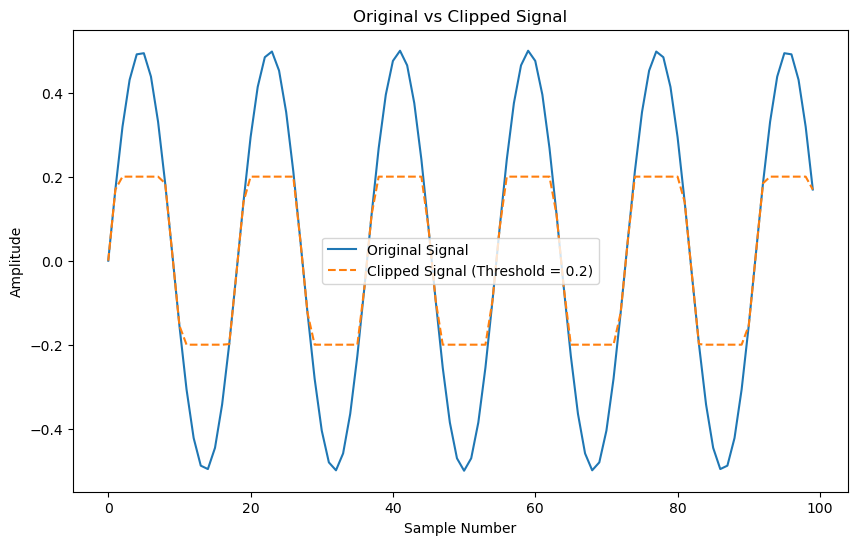

In [13]:
#5-
note = get_note(69, 8000, 2)  
clipping = 0.2
note_clipped = np.clip(note, -clipping, clipping)

scipy.io.wavfile.write('A4clip.wav', fs, note_clipped)

sounddevice.play(note_clipped, fs)
sounddevice.wait()  
plt.figure(figsize=(10, 6))
plt.plot(note[:100], label="Original Signal")
plt.plot(note_clipped[:100], label=f"Clipped Signal (Threshold = {clipping})", linestyle='--')
plt.title("Original vs Clipped Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

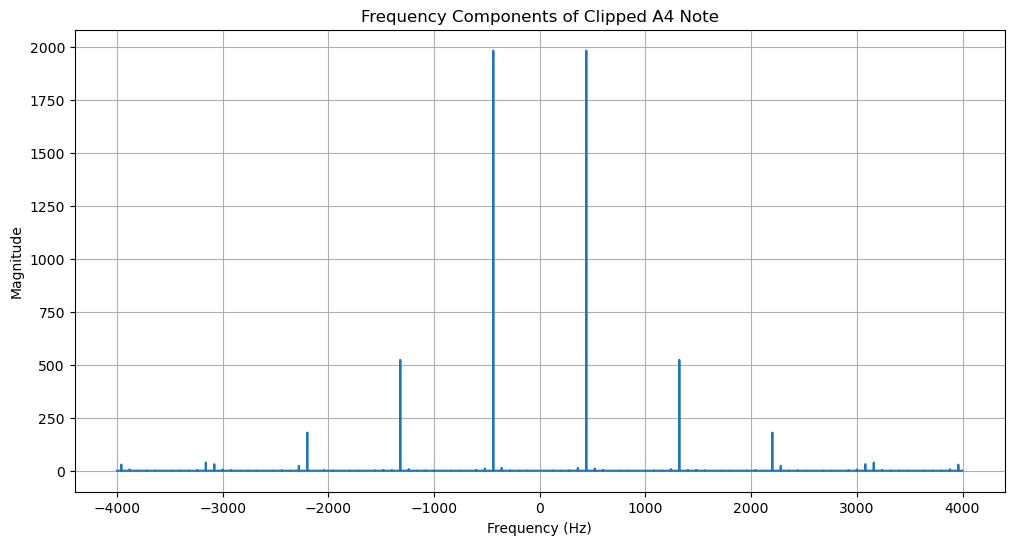

In [14]:
# Frequency analysis using FFT
fft_result = np.fft.fft(note_clipped) 
fft_freq = np.fft.fftfreq(len(note_clipped), d=1/fs) 

fft_result_shifted = np.fft.fftshift(fft_result)
fft_freq_shifted = np.fft.fftshift(fft_freq)

magnitude = np.abs(fft_result_shifted)

plt.figure(figsize=(12, 6))
plt.plot(fft_freq_shifted, magnitude)
plt.title('Frequency Components of Clipped A4 Note')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

We notice that the sound becomes more gritty as we clip the sound more (it sounds more like the dial tone on real phones)

Saturation affects the frequency content: The clipping intriduces harmonic distortion. The original sine wave contains one frequency 440(fundamental). However after clipping we see additional peaks in the frequency spectrum at multiples of 440 Hz, corresponding to the generated harmonics. The wave is no longer a pure sine and is distorted. The spectral density increases as the signal is clipped further (`clipping << amp`).




In [15]:
#6-
c= 500
f0 = 100
length=1
fs=8000

def x_sig(t,c,f0,fs,l):
    return np.sin(2*np.pi*(f0*t+t**2*c/2))
t = np.arange(0, length, 1/fs)

sig = x_sig(t_0,c,f0,fs,length)
scipy.io.wavfile.write('chirp.wav', fs, sig)
sounddevice.play(sig, fs)
sounddevice.wait() 

This signal has a frequency that increases with time which explains the 'chirp' effect

#### 2- Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT)

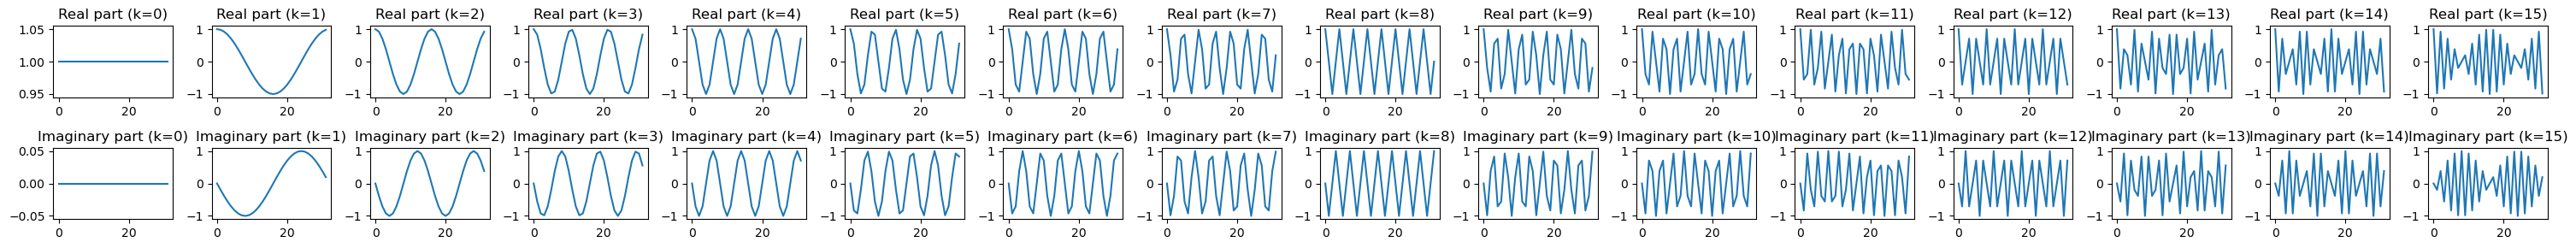

In [16]:
#1-
N = 32
def DFT(N):
    k_values = np.arange(N)
    n_values = np.arange(N)
    return np.exp(-1j * 2 * np.pi * k_values[None:,]* n_values[:,None]  / N) 
basis_functions = DFT(N)

fig, axs = plt.subplots(2, N//2, figsize=(30, 3))

for k in range(N//2):
    axs[0, k].plot(np.real(basis_functions[k, :]), label=f'Real part of k={k}')
    axs[0, k].set_title(f'Real part (k={k})')
    axs[1, k].plot(np.imag(basis_functions[k, :]), label=f'Imaginary part of k={k}')
    axs[1, k].set_title(f'Imaginary part (k={k})')

plt.tight_layout()
plt.show()

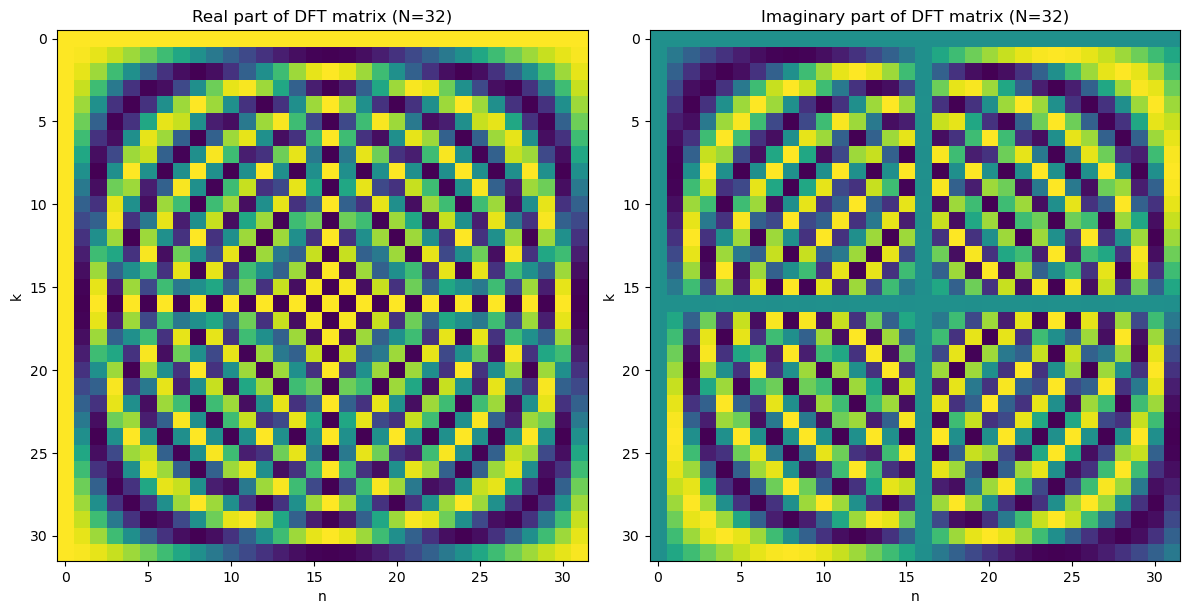

In [17]:
#2-
DFT_matrix = DFT(N)
fig, axs = plt.subplots(1,2, figsize=(12, 12))
#Real
axs[0].imshow(np.real(DFT_matrix))
axs[0].set_title('Real part of DFT matrix (N=32)')
axs[0].set_xlabel('n')
axs[0].set_ylabel('k')
# Imaginary 
axs[1].imshow(np.imag(DFT_matrix))
axs[1].set_title('Imaginary part of DFT matrix (N=32)')
axs[1].set_xlabel('n')
axs[1].set_ylabel('k')

plt.tight_layout()
plt.show()

The circular patterns emerge from the cosine components of the complex exponentials. Each element $W[k,n] = e^{-2\pi ikn/N}$ contains a real part, which is essentially the cosine term, and an imaginary one (sine). The checkerboard pattern is due to the alternating nature of the sine and cosine functions across different frequencies and phases.

##### 2.1 Basis functions and Discrete Fourier Transform Matrix

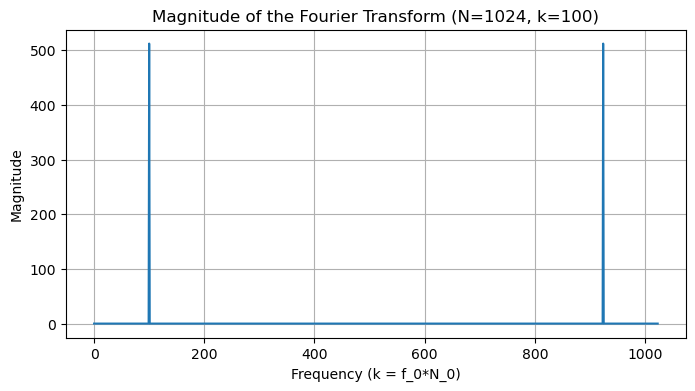

In [18]:
#3-
N = 1024

def compute_and_plot_dft(N, k):
    f0 = k / N 
    n_values = np.arange(N)
    x_n = np.cos(2 * np.pi * f0 * n_values)

    X_k = np.dot(DFT(N), x_n)

    plt.figure(figsize=(8, 4))
    plt.plot(np.abs(X_k))#[:N//2]))
    plt.title(f'Magnitude of the Fourier Transform (N={N}, k={k})')
    plt.xlabel('Frequency (k = f_0*N_0)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()

# Example k<N/2:
compute_and_plot_dft(N=1024, k=100)

we observe 2 peaks in k = 100 and k = N-100 = 924

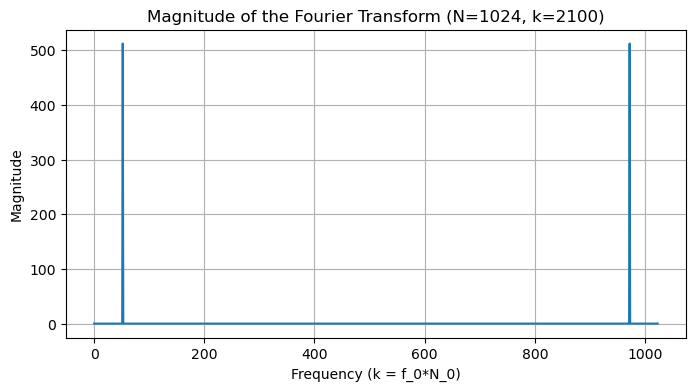

In [19]:
#4- Example k>N:
compute_and_plot_dft(N=1024, k=2100)

Observation : 
(Since the spectrum is symmetric we'll talk about the positive part only WLOG)
As we increase $k$ gradually up to the Nyquist threshold 512 = N/2 the spectrum is deviated to the left. Then it redeviated back to the right : the spectrum folds back (repliement de spectre) 

Explanation:
When $f_0$ is increased such that $k > N$, the spectrum exhibits aliasing. This happens because frequencies beyond the Nyquist frequency are folded back into the lower half of the spectrum. As a result, the frequency components appear as if they were at lower frequencies, causing distortion and misinterpretation of the actual signal's frequency content.

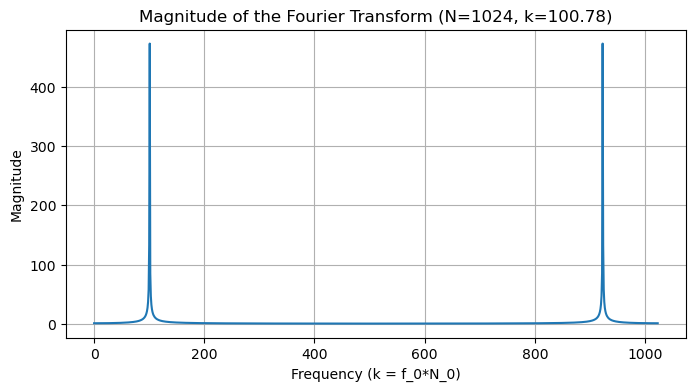

In [20]:
#5-k non integer
compute_and_plot_dft(N=1024, k=100.78) 

When $k$ is set to a non-integer value, the spectrum becomes spread out rather than sharp. This is due to the fact that the DFT supposes that the signal is periodic and operates on integer multiples of frequencies. Non-integer values result in spectral leakage, where energy from one frequency bin leaks into adjacent bins, causing a broader and less defined peak in the frequency domain.

##### 2.2 Fast Fourier Transform

In [21]:
#1-
def time_dft(N, k):
    f0 = k / N  
    n_values = np.arange(N)
    x_n = np.cos(2 * np.pi * f0 * n_values)

    # without pre-computation (direct DFT)
    start_no = time.perf_counter()
    X_k_no_matrix = np.array([np.sum(x_n * np.exp(-1j * 2 * np.pi * n * np.arange(N) / N)) for n in range(N)])
    end_no = time.perf_counter()
    # with pre-computation
    start_precomp = time.perf_counter()
    DFT_matrix = np.exp(-1j * 2 * np.pi * n_values[:,None]*n_values/N) 
    X_k_matrix = np.dot(DFT_matrix, x_n)
    end_precomp = time.perf_counter()

    print(f"Time without Fourier matrix pre-computation: {end_no - start_no} seconds")
    print(f"Time with Fourier matrix pre-computation: {end_precomp - start_precomp} seconds")

time_dft(N=1024, k=100)


Time without Fourier matrix pre-computation: 0.08386812499975349 seconds
Time with Fourier matrix pre-computation: 0.04581270800008497 seconds


DFT with the Fourier Matrix pre-computation is slightly faster than without it but they are both in the same order of magnitude

In [22]:
#2-
def time_fft_vs_dft(N, k):
    f0 = k / N  # Frequency component
    n_values = np.arange(N)
    x_n = np.cos(2 * np.pi * f0 * n_values)

    # DFT without pre-computation
    start_no = time.perf_counter()
    X_k_no_matrix = np.array([np.sum(x_n * np.exp(-1j * 2 * np.pi * n * np.arange(N) / N)) for n in range(N)])
    end_no = time.perf_counter()

    # DFT with pre-computation
    start_precomp = time.perf_counter()
    DFT_matrix = np.exp(-1j * 2 * np.pi * n_values[:,None]*n_values/N)
    X_k_matrix = np.dot(DFT_matrix, x_n)
    end_precomp = time.perf_counter()

    # FFT 
    start_fft = time.perf_counter()
    X_k_fft = np.fft.fft(x_n)
    end_fft = time.perf_counter()

    print(f"Time without Fourier matrix pre-computation (Direct DFT): {end_no - start_no:.6f} seconds")
    print(f"Time with Fourier matrix pre-computation: {end_precomp - start_precomp} seconds")
    print(f"Time using FFT (np.fft.fft): {end_fft - start_fft} seconds")

# Example usage:
time_fft_vs_dft(N=1024, k=100)


Time without Fourier matrix pre-computation (Direct DFT): 0.075596 seconds
Time with Fourier matrix pre-computation: 0.051864540999304154 seconds
Time using FFT (np.fft.fft): 4.216699926473666e-05 seconds


FFT is much faster than both DFT computations with and without matrix precomputation by 3 orders of magnitude.


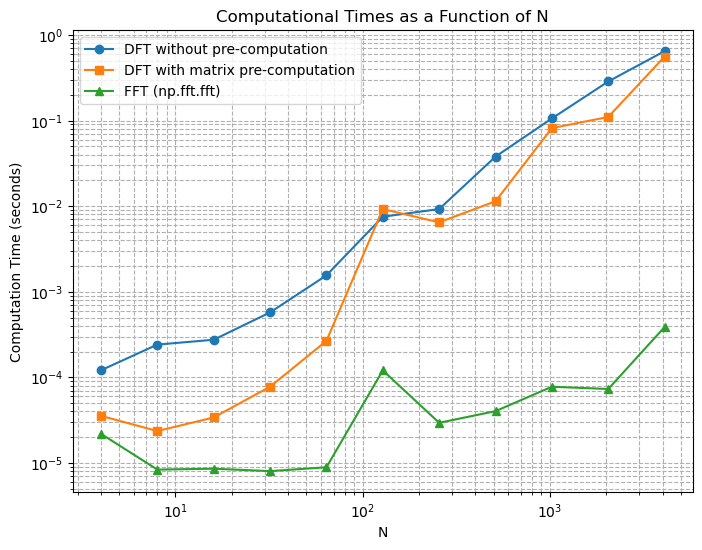

In [23]:
#3-
k_values = np.arange(2, 13) 
N_values = 2 ** k_values

times_dft = []
times_dft_matrix = []
times_fft = []


for N in N_values:
    k_signal = 100  # We can keep this constant
    f0 = k_signal / N
    n_values = np.arange(N)
    x_n = np.cos(2 * np.pi * f0 * n_values)

    # DFT without pre-computation
    start_no = time.perf_counter()
    X_k_no_matrix = np.array([np.sum(x_n * np.exp(-1j * 2 * np.pi * n * np.arange(N) / N)) for n in range(N)])
    end_no = time.perf_counter()
    times_dft.append(end_no - start_no)

    # DFT with  pre-computation
    start_precomp = time.perf_counter()
    DFT_matrix = np.exp(-1j * 2 * np.pi * n_values[:,None]*n_values/N)
    X_k_matrix = np.dot(DFT_matrix, x_n)
    end_precomp = time.perf_counter()
    times_dft_matrix.append(end_precomp - start_precomp)

    # FFT
    start_fft = time.perf_counter()
    X_k_fft = np.fft.fft(x_n)
    end_fft = time.perf_counter()
    times_fft.append(end_fft - start_fft)

plt.figure(figsize=(8, 6))
plt.loglog(N_values, times_dft, label='DFT without pre-computation', marker='o')
plt.loglog(N_values, times_dft_matrix, label='DFT with matrix pre-computation', marker='s')
plt.loglog(N_values, times_fft, label='FFT (np.fft.fft)', marker='^')

plt.xlabel('N')
plt.ylabel('Computation Time (seconds)')
plt.title('Computational Times as a Function of N')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


For small values of N, FFT is faster than DFT with precomputation, which is faster than DFT without precomputation. As N increases, the difference between DFT with and without precomputation decreases, and their difference with FFT becomes way more significant as FFT time remains in the same order of magnitude even for larger N.

This is because DFT grows quadratically in N whereas FFT grows logarithmically. FFT is clearly more efficient especially when N is large

##### 2.3 Interpreting signals

In [24]:
# 1- Loading signals
def load_wav_file(file_path):
    fs, x = scipy.io.wavfile.read(file_path)
    return x, fs

def load_npz_file(file_path):
    data = np.load(file_path)
    x = data['x']  
    fs = data['fs']  
    return x, fs

audio_files = {
    'A4.wav': None,
    'A4clip.wav': None,
    'seq.wav': None,
    'chirp.wav':None,
    'uku.wav':None,
    'uku2.wav':None,
    'drum.wav':None,
    'stairway.wav':None,
    'stairwayb.wav':None,
    'ecg.npz':None,
    'conso.npz':None,
}

loaded_signals = {} # dictionary to store signals and sampling frequencies

for filename, description in audio_files.items():
    if (filename[-4:]=='.wav'): #wav files
        x, fs = load_wav_file(filename)
        loaded_signals[filename] = {'signal': x,'sampling_frequency': fs,}
        print(f"Loaded {filename}:")
        print(f"  Sampling Frequency: {fs} Hz")
    else: #npz files
        x, fs = load_npz_file(filename)
        loaded_signals[filename] = {'signal': x,'sampling_frequency': fs,}
        print(f"Loaded {filename}:")
        print(f"  Sampling Frequency: {fs} Hz")

Loaded A4.wav:
  Sampling Frequency: 8000 Hz
Loaded A4clip.wav:
  Sampling Frequency: 8000 Hz
Loaded seq.wav:
  Sampling Frequency: 8000 Hz
Loaded chirp.wav:
  Sampling Frequency: 8000 Hz
Loaded uku.wav:
  Sampling Frequency: 8000 Hz
Loaded uku2.wav:
  Sampling Frequency: 8000 Hz
Loaded drum.wav:
  Sampling Frequency: 16000 Hz
Loaded stairway.wav:
  Sampling Frequency: 44100 Hz
Loaded stairwayb.wav:
  Sampling Frequency: 16000 Hz
Loaded ecg.npz:
  Sampling Frequency: 360 Hz
Loaded conso.npz:
  Sampling Frequency: 0.016666666666666666 Hz


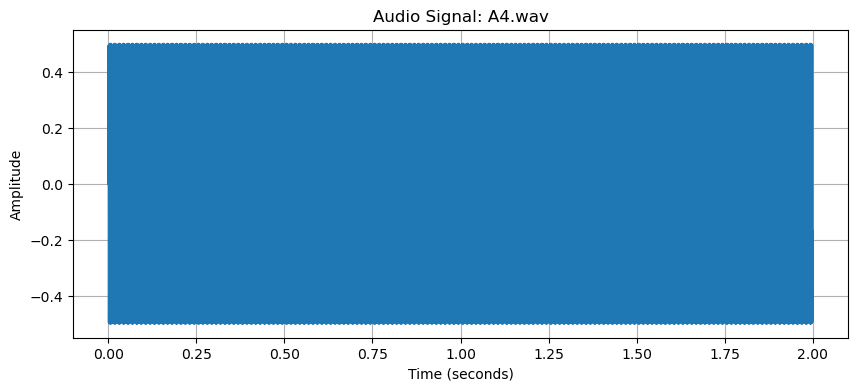

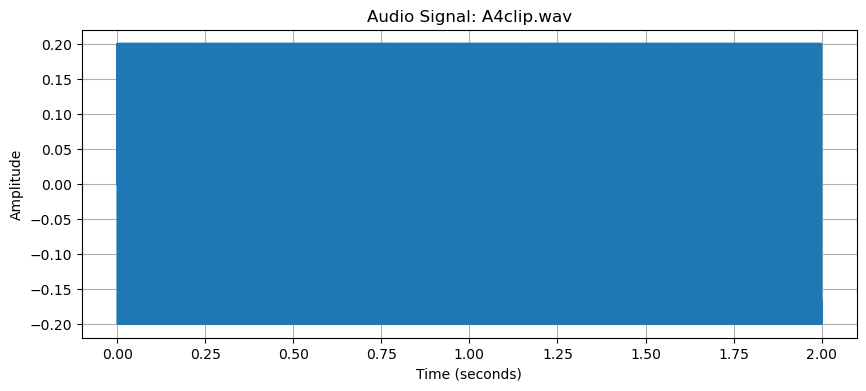

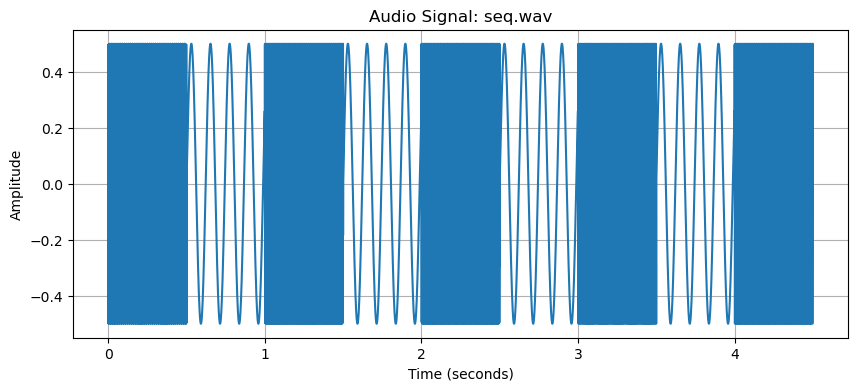

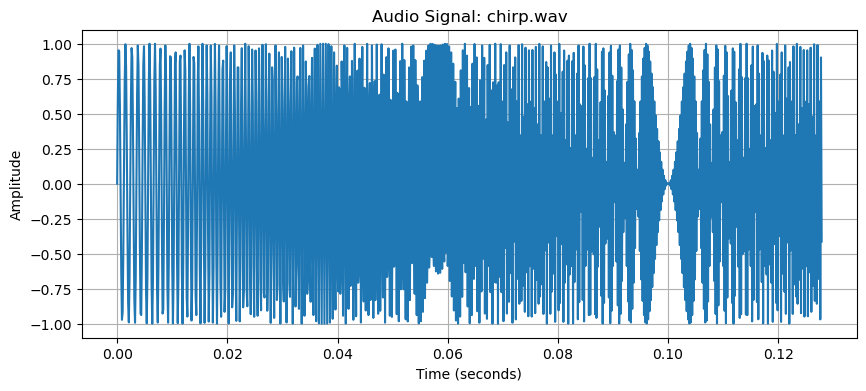

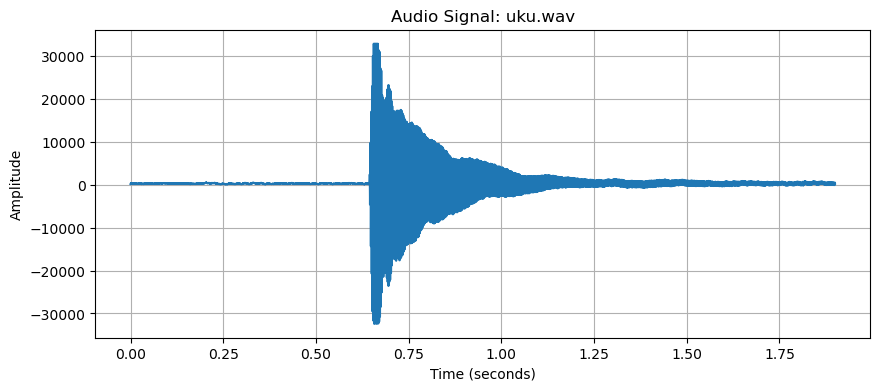

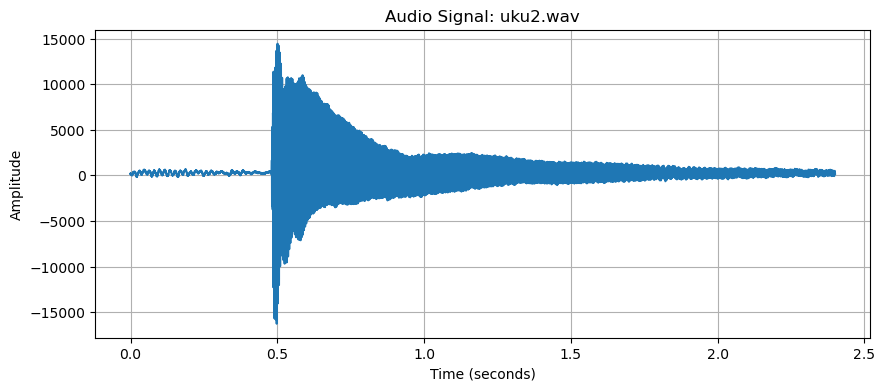

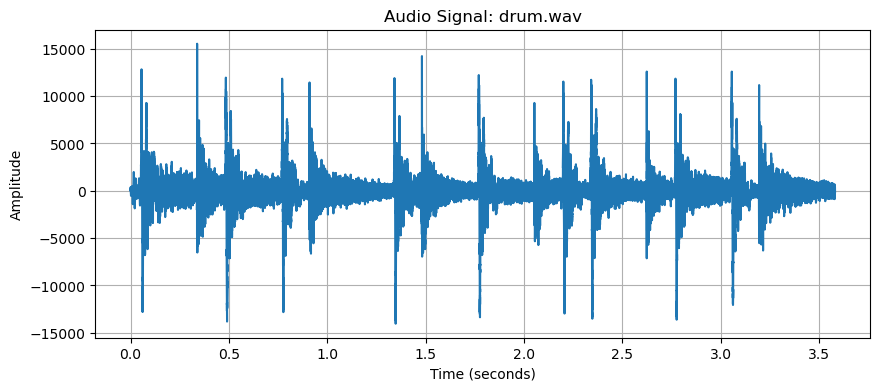

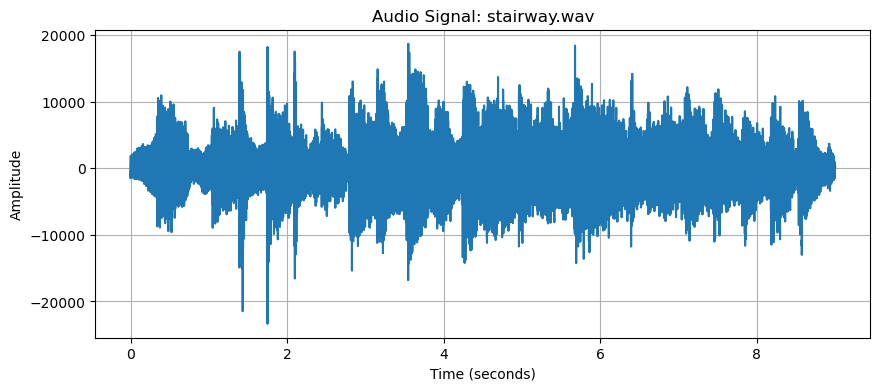

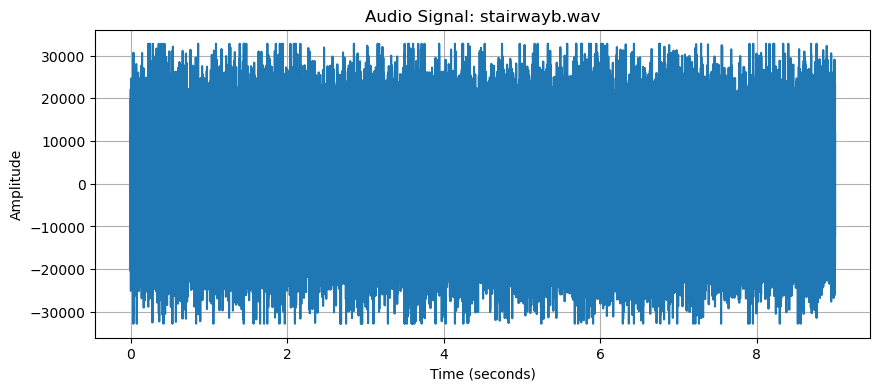

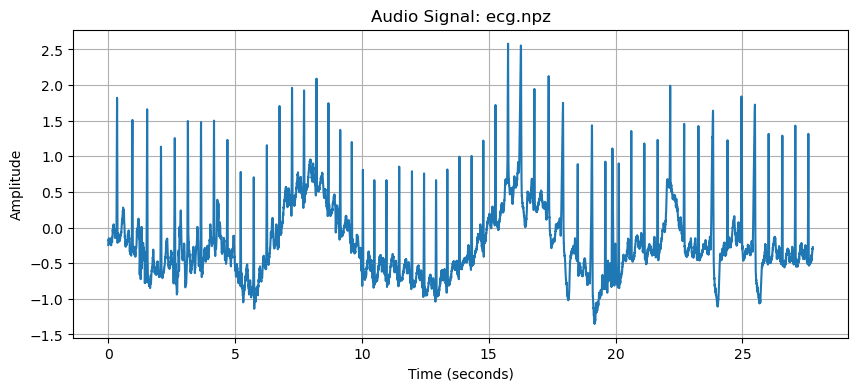

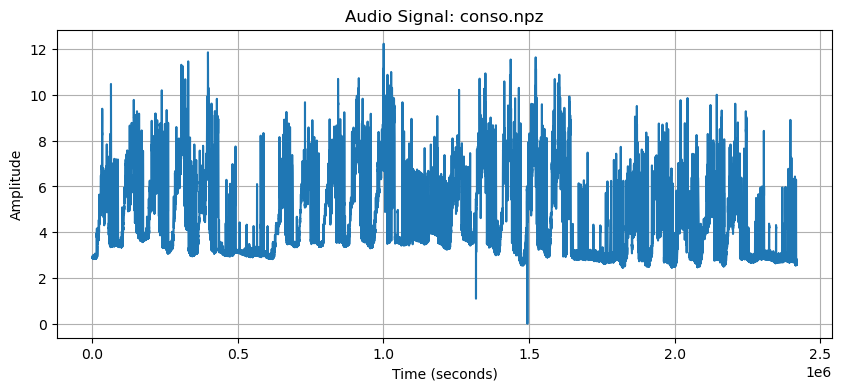

In [25]:
# 2- Plotting signals
for filename, data in loaded_signals.items():
    x = data['signal']
    fs = data['sampling_frequency']
    time = np.arange(len(x))/fs
    plt.figure(figsize=(10, 4))
    plt.plot(time, x)
    plt.title(f'Audio Signal: {filename}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

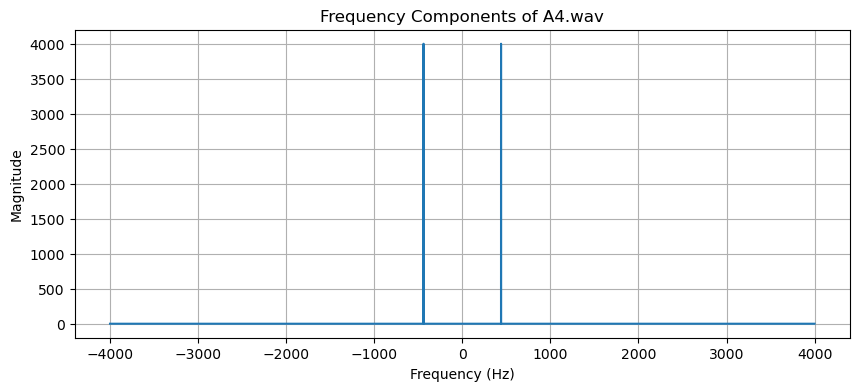

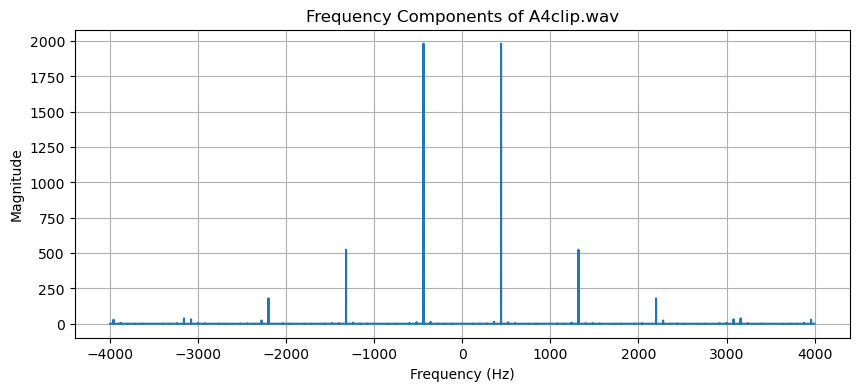

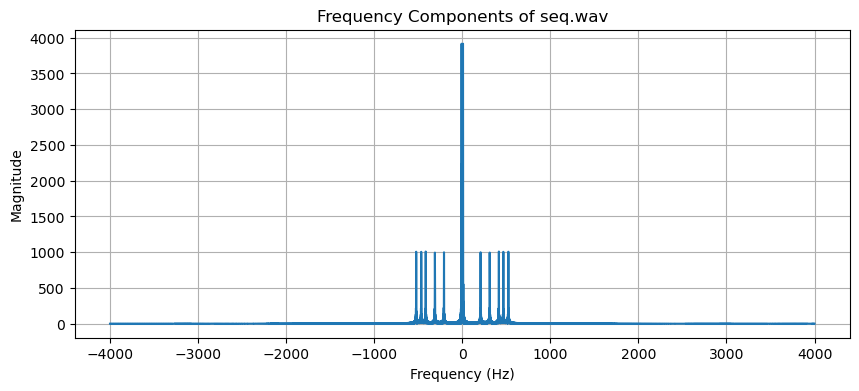

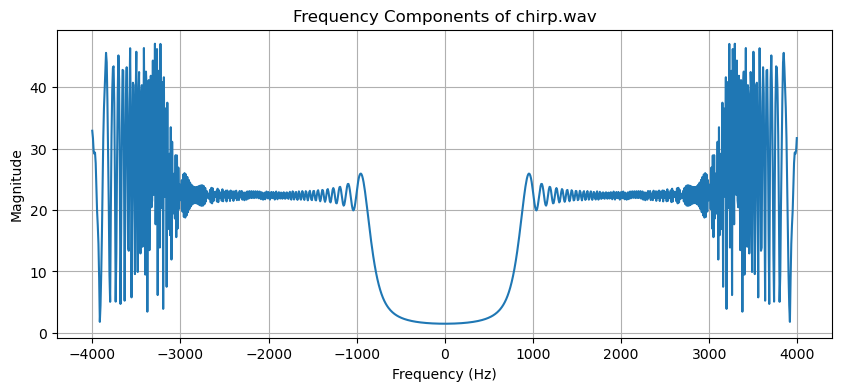

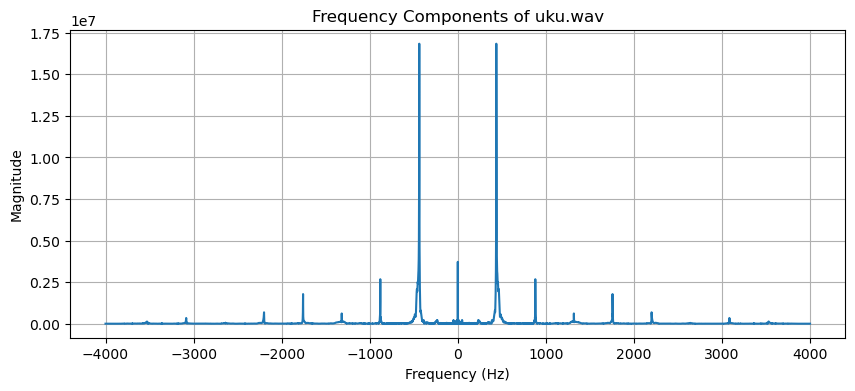

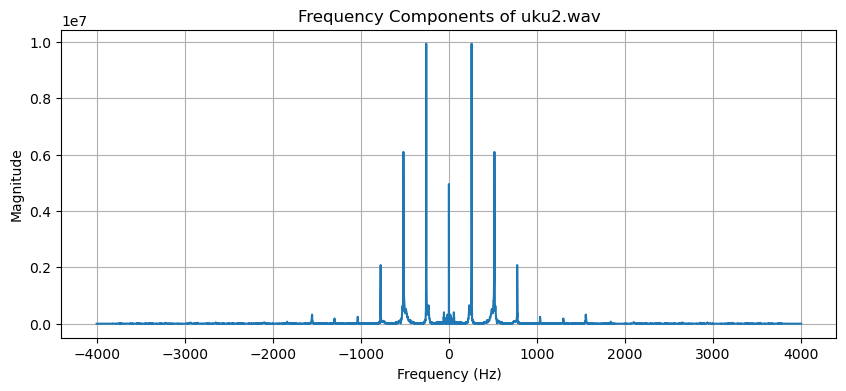

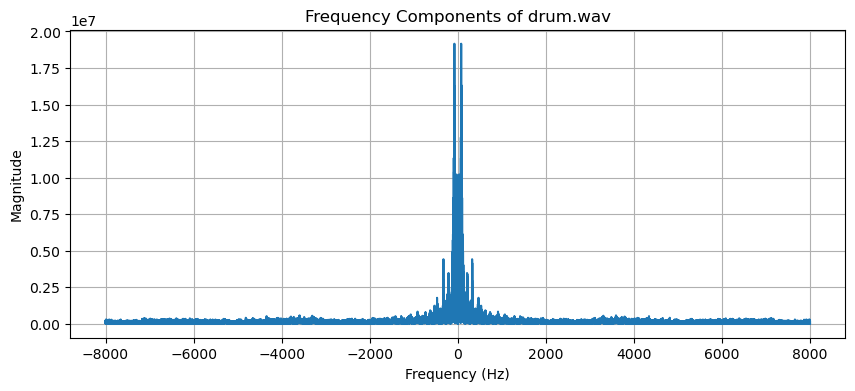

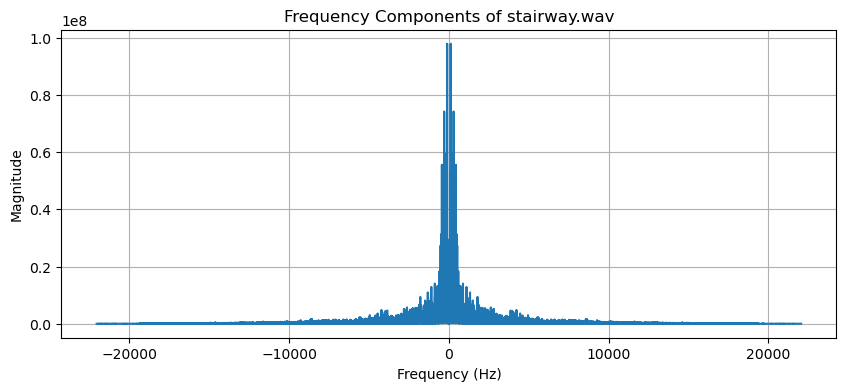

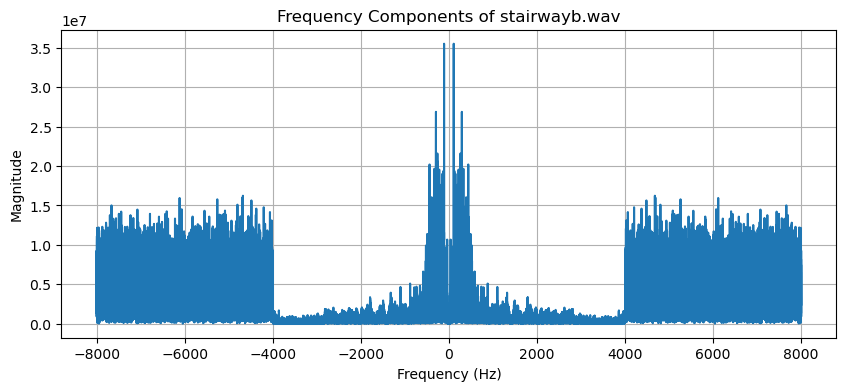

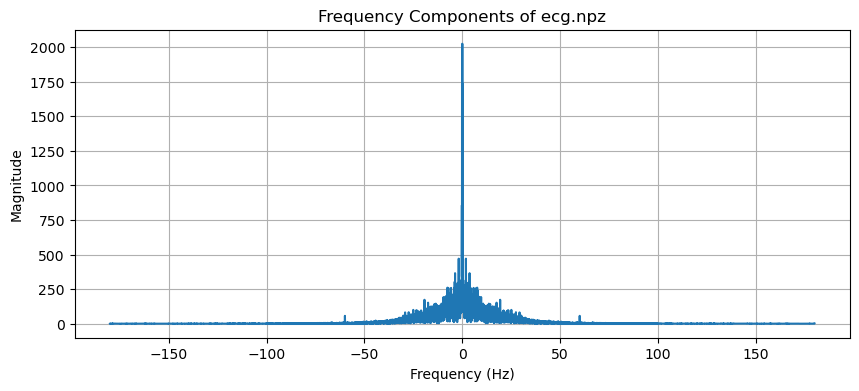

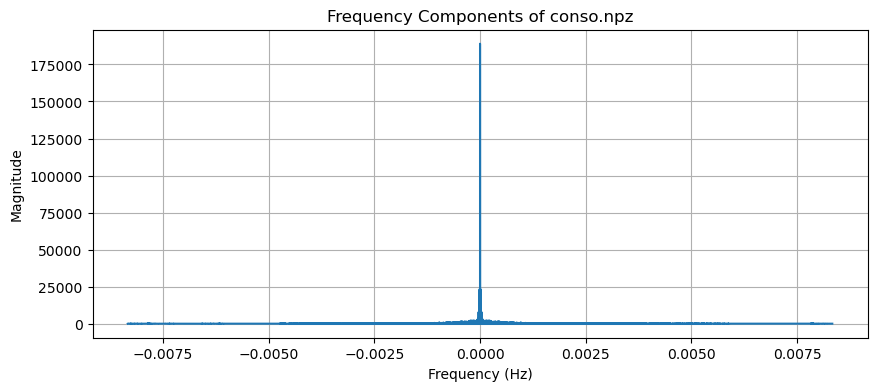

In [26]:
#3 FFT magnitude
plots = {} #dictionary to store the freuency components of each signal
for filename, data in loaded_signals.items():
    x = data['signal']
    fs = data['sampling_frequency']
    plt.figure(figsize=(10, 4))

    fft_result = np.fft.fft(x) 
    fft_freq = np.fft.fftfreq(len(x), d=1/fs) 

    fft_result_shifted = np.fft.fftshift(fft_result)
    fft_freq_shifted = np.fft.fftshift(fft_freq)

    magnitude = np.abs(fft_result_shifted)
    plots[filename] = {'freq': fft_freq_shifted,'mag': magnitude,}

    plt.plot(fft_freq_shifted, magnitude)
    plt.title(f'Frequency Components of {filename}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()

#5- Questions about the signals :

`A4.wav` : has a constant amplitude (the original 0.5) and one frequency (the fundamental fm = 440Hz

`A4clip.wav`: has a constant lipped amplitude (0.2), the spectrum contains harmonics that are multiples of the fundamental 440 Hz, their magnitudes decrease as they stray away from the center. The spectrum is changed due to saturation.

`seq.wav`: has a constant amplitude (0.5), the spectrum contains all the five MIDI frequencies in the sequence with the same magnitude because they are concatenated.

`chirp.wav`: x is a modulated signal with instantaneous frequency $f_0 + c.t$ . The frequency increases over time because of the $ct$ term, where c is the frequency deviation. Hence the support of the spectrum is not limited : $supp = [f_0;+\infty[ = [100Hz;+\infty[$ (for the positive frequency domain, it is symmetrival for the negative)

Theoretically the frequency density should be 0 outside the support in $]-f_0,f_0[$, however we see on the plot that that is not the case, this could be due to the finite duration of the chirp and spectral leakage.



`uku.wav`: When zooming on the plot using ` pl.xlim([xmin,xmax])` we can see that the main positive frequence in the spectrum (the one with the highest magnitude) is around 437.3 Hz --> m = 68.89, which is close to A4 concert pitch corresponding to the MIDI note m = 69. *(according to inspiredacoustics.com)*

`uku2.wav`: The main frequency is around 257.5 Hz --> m = 59.72, which is close to C4 corresponding to the MIDI note m = 60. The next highest magnitiude is for frequency 516.7 Hz --> m = 71.78, which is close to C5 of MIDI note m = 72

`drum.wav`: The spectral density is concentrated at frequencies near 0  with prominent peaks in the lower frequency range (the highest magnitude at 77 Hz) because of the bass drum sound which has a significant low-frequency component. Other high frequencies are present but with very low magnitude, the cymbal is barely audible.

`stairway.wav`: The magnitude peak in the low frequency domain is obtained around 110 Hz, which corresponds to the MIDI note m = 45 (Note A2). This could be considered the mode as FFT takes the magnitude average over the whole audio. It is safe to assume that the highest magnitude also corresponds to the most played note in the sequence.

`stairwayb.wav`: The outlier frequencies in this corrupted file are on the higher end of the spectrum. By comparing it to `stairway.wav` we can deduct that the support of the noise is between 4000Hz and 8000Hz (symmetrical for negative frequencies)

`ecg.npz`: The average beat per minute cannot be seen on the spectrum because it is a time based metric whereas the spectrum shows frequency content. On the amplitude plot we see that there is an average on 10 beats per 5 seconds, corresponding to 120 beats per minute, this corresponds to a frequency close to 2, there is a small peak at around 1.8 but it is barely visible because of the low frequency noise. Additionnaly, there is a peak at 60 Hz, which is the electric noise frequency in the US. This signal was recorded in the US.

`conso.npz`: One day is 86400 seconds, one week is 604800 seconds. On the temporal signal we can see 2 periodicities: 4 large periods corresponding to 4 weeks of around 500000 seconds. And 6 smaller periods within each large one corresponding to week days (about 80000 seconds). We can see both these frequencies on the spectrum (see zoom below): 1.25e-05 and 2e-06
    
        

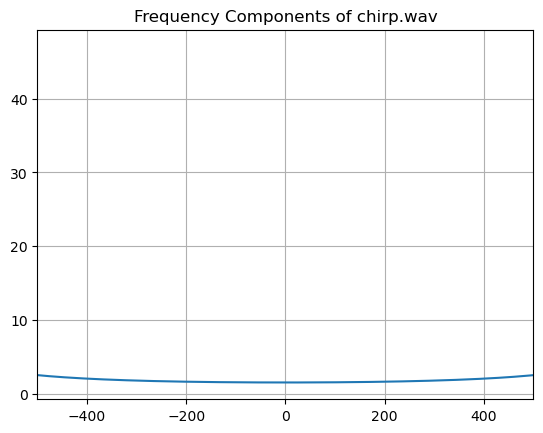

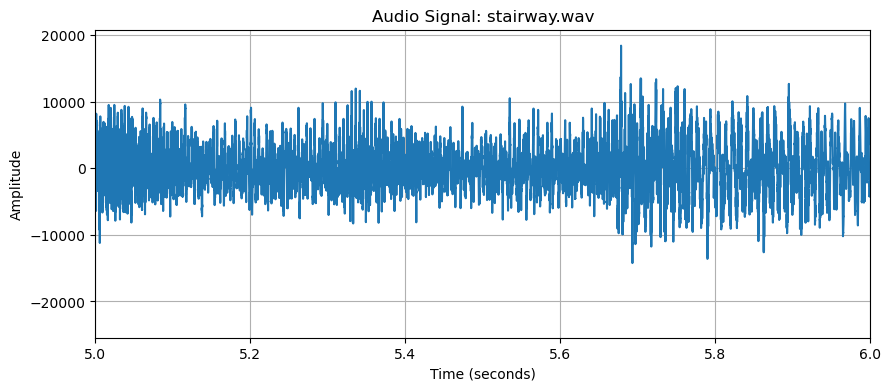

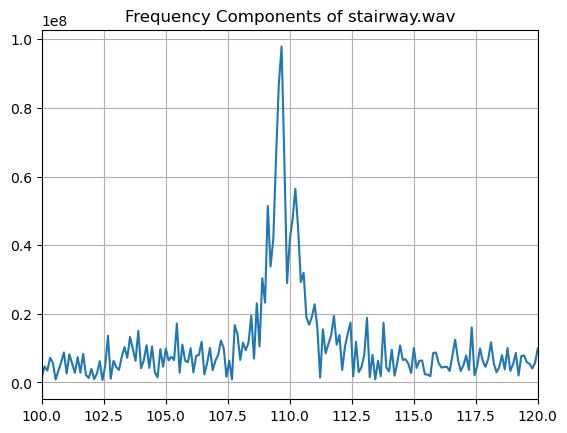

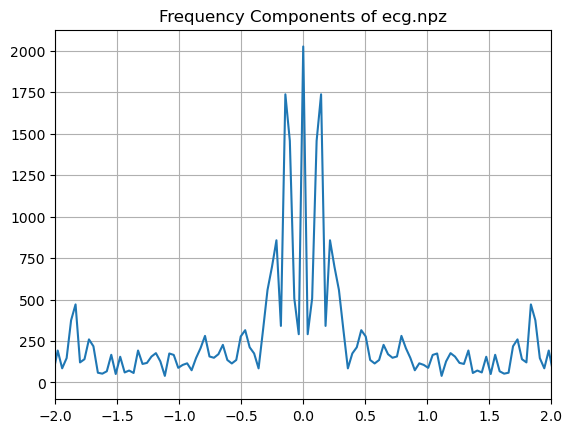

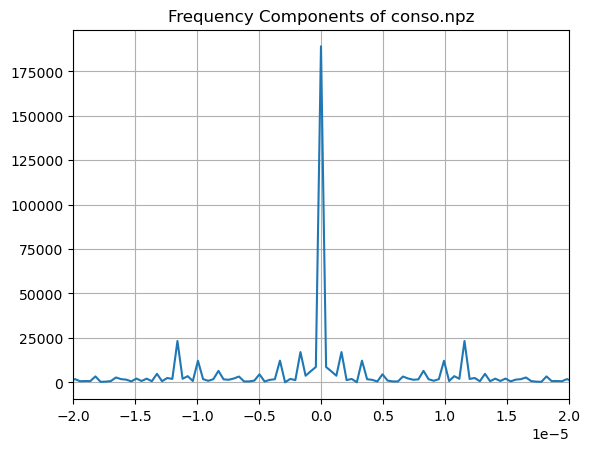

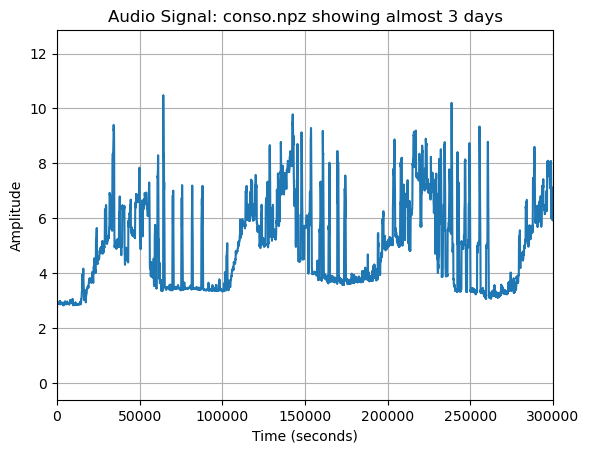

In [27]:
#useful zooms on the plots

freq = plots['chirp.wav']['freq']
mag = plots['chirp.wav']['mag']
plt.plot(freq, mag)
plt.xlim(-500,500)
plt.grid()
plt.title(f'Frequency Components of chirp.wav')
plt.show()

x = loaded_signals['stairway.wav']['signal']
fs = loaded_signals['stairway.wav']['sampling_frequency']
time = np.arange(len(x))/fs
plt.figure(figsize=(10, 4))
plt.plot(time, x)
plt.title('Audio Signal: stairway.wav')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(5,6)
plt.grid()
plt.show()
freq = plots['stairway.wav']['freq']
mag = plots['stairway.wav']['mag']
plt.plot(freq, mag)
plt.xlim(100,120)
plt.grid(True)
plt.title(f'Frequency Components of stairway.wav')
plt.show()
freq = plots['ecg.npz']['freq']
mag = plots['ecg.npz']['mag']
plt.plot(freq, mag)
plt.xlim(-2,2)
plt.grid(True)
plt.title(f'Frequency Components of ecg.npz')
plt.show()

freq = plots['conso.npz']['freq']
mag = plots['conso.npz']['mag']
plt.plot(freq, mag)
plt.xlim(-0.00002,0.00002)
plt.grid(True)
plt.title(f'Frequency Components of conso.npz')
plt.show()

x = loaded_signals['conso.npz']['signal']
fs = loaded_signals['conso.npz']['sampling_frequency']
time = np.arange(len(x))/fs
plt.plot(time, x)
plt.title('Audio Signal: conso.npz showing almost 3 days')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,300000)
plt.grid()
plt.show()

#### 3- Digital filtering

##### 3.1 Ideal filtering

In [28]:
#1-
stairway, fs = load_wav_file('stairwayb.wav')

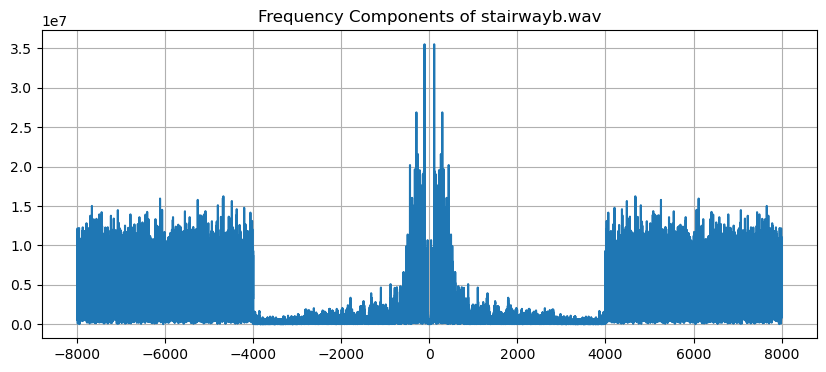

In [29]:
#2-
freq = plots['stairwayb.wav']['freq']
mag = plots['stairwayb.wav']['mag']
plt.figure(figsize=(10, 4))
plt.plot(freq, mag)
plt.grid()
plt.title(f'Frequency Components of stairwayb.wav')
plt.show()

 The frequency support of the noise is above 4000Hz and below -4000Hz. So a good cutoff frequency for an ideal low-pass filter should be $f_c=4000Hz$ to cut out the entire frequency band where noise is present.

In [30]:
#3-
signal_fft = np.fft.fft(stairway)
frequencies = np.fft.fftfreq(len(signal_fft), 1/fs)

fc = 4000
ideal_filter = np.abs(frequencies) < fc

filtered_fft = signal_fft * ideal_filter
filtered_stairway = np.fft.ifft(filtered_fft).real

# scaling
filtered_stairway /= np.max(np.abs(filtered_stairway))
scipy.io.wavfile.write('filtered_stairway_ideal.wav', fs , filtered_stairway)
sounddevice.play(filtered_stairway, fs)
sounddevice.wait()

The filtered signal is less noisy than the original `stairwayb.wav`

#4-

The lowest frequency in `seq.wav` is $f_{56}=207.65$ corresponding to m = 56. We can choose a cutoff frequency $f_c=210 <f_{63}$

In [31]:
seq, fs = load_wav_file('seq.wav')
signal_fft = np.fft.fft(seq)
frequencies = np.fft.fftfreq(len(signal_fft), 1/fs)
fc = 210
ideal_filter = np.abs(frequencies) < fc

filtered_fft = signal_fft * ideal_filter
filtered_seq = np.fft.ifft(filtered_fft).real

filtered_seq /= np.max(np.abs(filtered_seq))
scipy.io.wavfile.write('filtered_seq.wav', fs , filtered_seq)
sounddevice.play(filtered_seq, fs)
sounddevice.wait()

Only one note remains, it is the lowest frequency one

Low-Pass Filter Static Gain at 0 Hz: True
High-Pass Filter Static Gain at 0 Hz: False


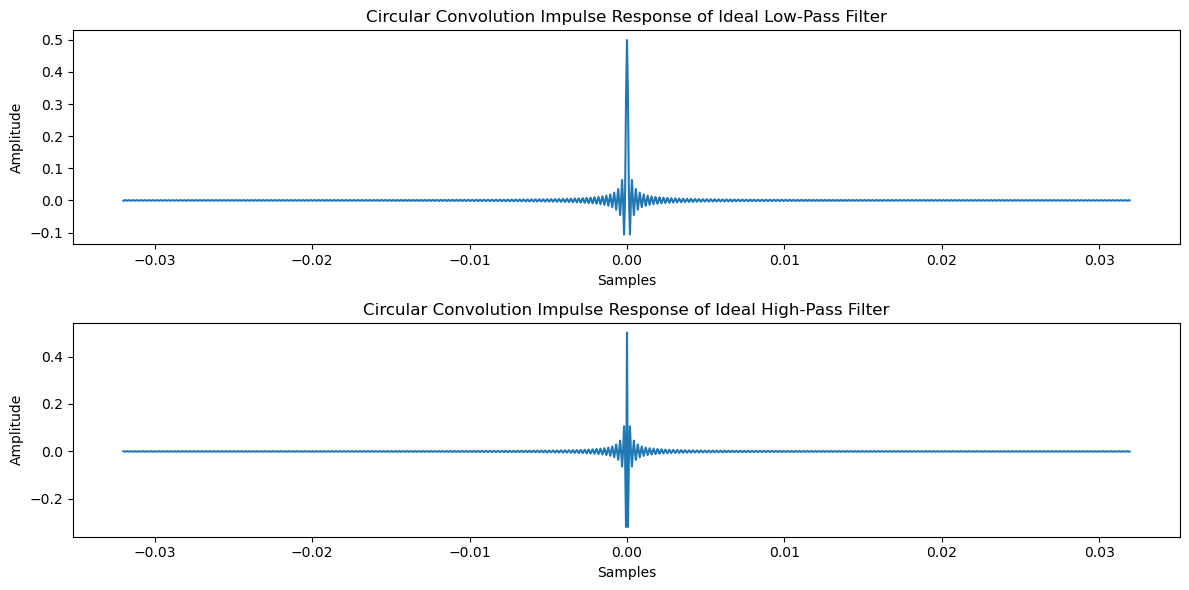

In [32]:
#5-
stairway, fs = load_wav_file('stairwayb.wav')
fc = 4000
N = 1024 
frequencies = np.fft.fftfreq(N, 1/fs)

lp_filter = np.abs(frequencies) < fc # Ideal Low-Pass 
hp_filter = np.abs(frequencies) >= fc # Ideal High-Pass 

# Inverse Fourier Transform
lp_impulse_response = np.fft.ifft(lp_filter).real
lp_impulse_response = np.fft.fftshift(lp_impulse_response)

hp_impulse_response = np.fft.ifft(hp_filter).real
hp_impulse_response = np.fft.fftshift(hp_impulse_response)

# Static gain
print(f"Low-Pass Filter Static Gain at 0 Hz: {lp_filter[0]}")
print(f"High-Pass Filter Static Gain at 0 Hz: {hp_filter[0]}")

plt.figure(figsize=(12, 6))
time = np.arange(-N/2, N/2) / fs

plt.subplot(2, 1, 1)
plt.plot(time, lp_impulse_response)
plt.title('Circular Convolution Impulse Response of Ideal Low-Pass Filter')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time, hp_impulse_response)
plt.title('Circular Convolution Impulse Response of Ideal High-Pass Filter')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


As expected, the low-pass filter passes the 0 frequency (the gain at 0 Hz is 1). The high-pass filter cuts the 0 frequency (the gain at 0 Hz is 0).

We observe characteristics of the sinc function in the impulse responses with a peak at 0 and oscillations that approach 0 as we move away from the center

##### 3.2 Digital filter design

In [33]:
#1-
fc = 0.2 
n = 2    

# Compute the coefficients
b, a = scipy.signal.butter(n, fc, btype='lowpass')

print("Numerator Coefficients (b):", b)
print("Denominator Coefficients (a):", a)


Numerator Coefficients (b): [0.06745527 0.13491055 0.06745527]
Denominator Coefficients (a): [ 1.        -1.1429805  0.4128016]


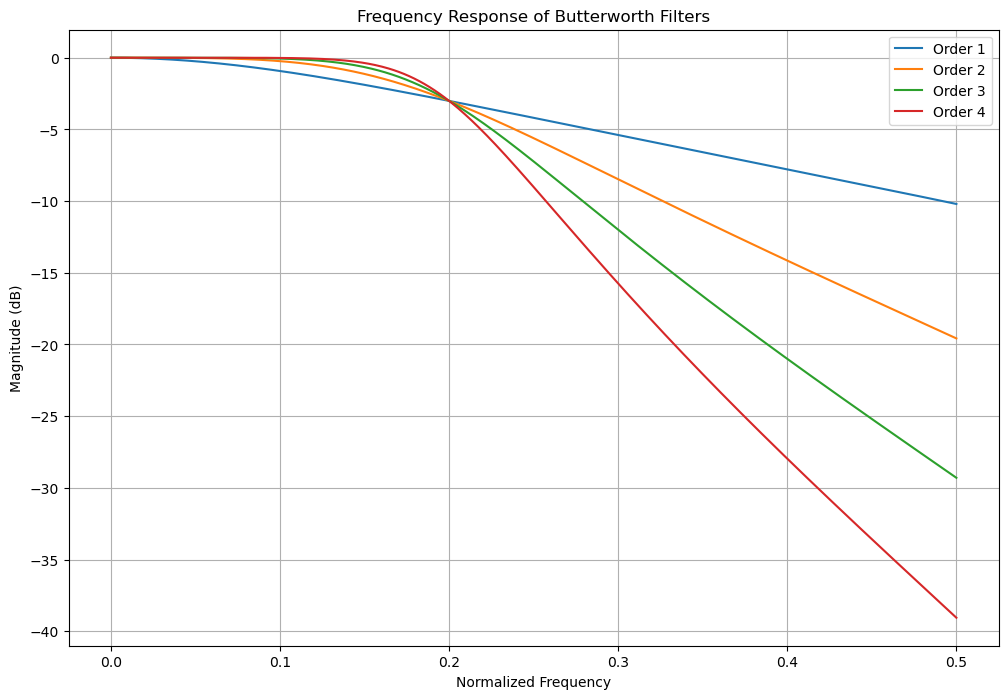

In [34]:
#2- 
# normalized Frequencies
f = np.linspace(0, 0.5, 500) #sampling rate=1, Nyquist = 0.5

def freq_resp(b, a, f):
    w, h = scipy.signal.freqz(b, a, worN= np.pi*f)
    return w,h

plt.figure(figsize=(12, 8))

for n in range(1, 5):
    b, a = scipy.signal.butter(n, fc, btype='lowpass')
    _,h = freq_resp(b, a,f)
    plt.plot(f, 20 * np.log10(np.abs(h)), label=f'Order {n}')

plt.title('Frequency Response of Butterworth Filters')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.legend()
plt.show()


As the filter order increases, the steepness of the roll-off increases

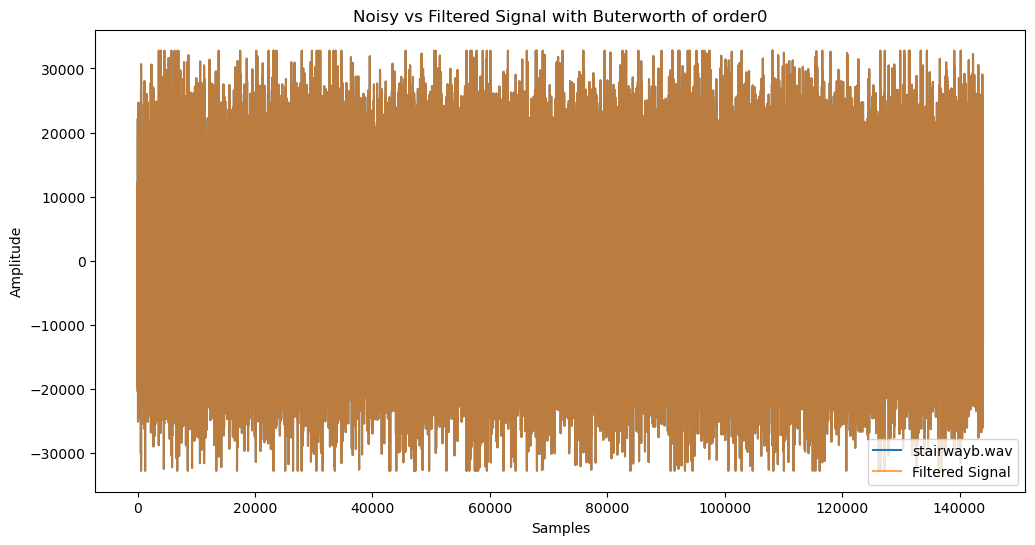

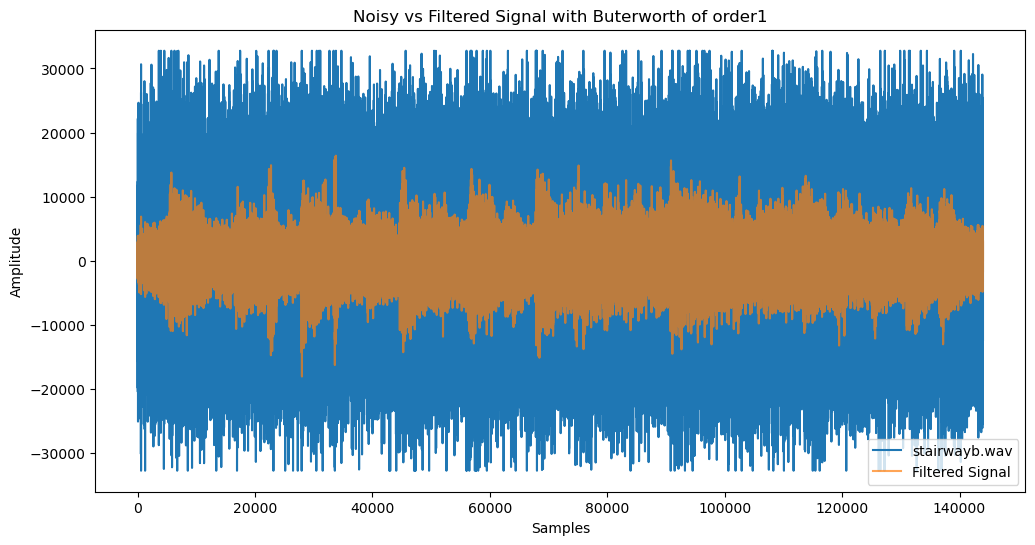

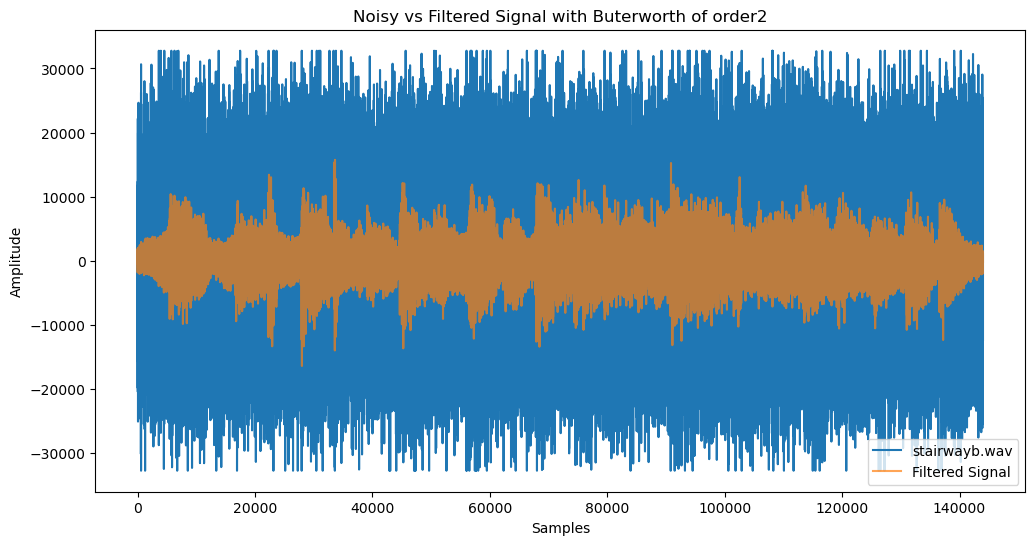

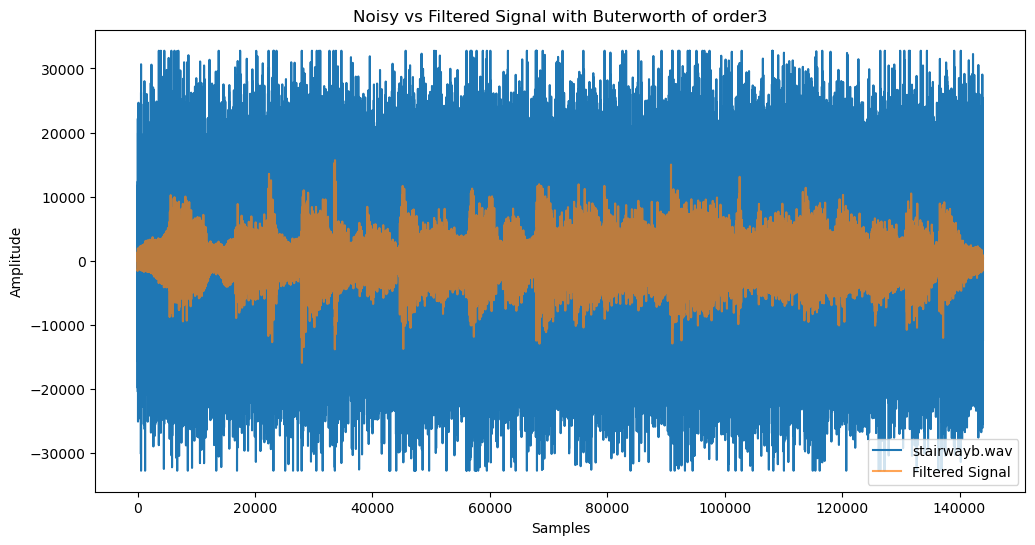

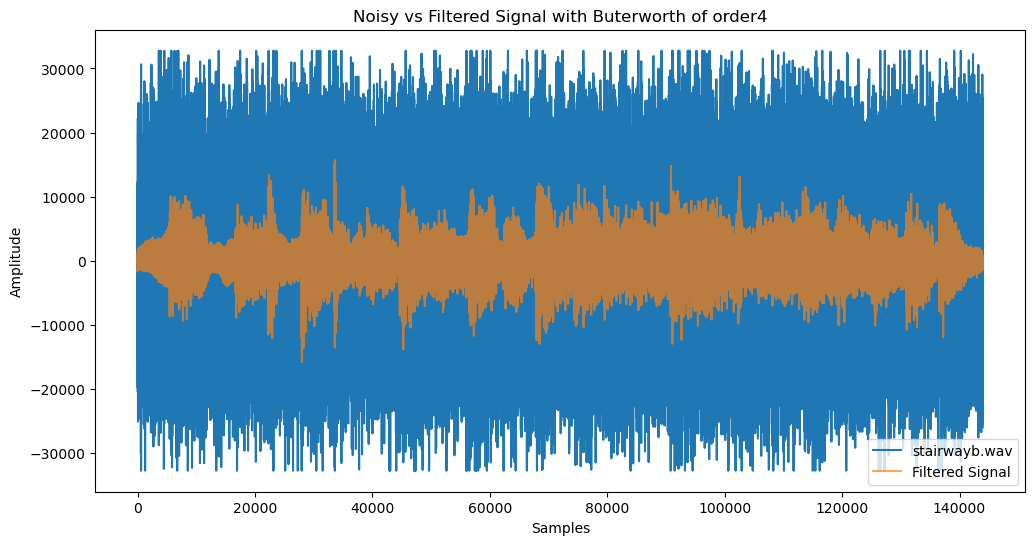

In [35]:
# 3-
fc= 0.2
stairway, fs = load_wav_file('stairwayb.wav')

orders = [0, 1, 2, 3, 4]

for n in orders:
    b, a = scipy.signal.butter(n, fc, btype='lowpass')
    filtered_signal = scipy.signal.lfilter(b, a, stairway)

    plt.figure(figsize=(12, 6))
    plt.plot(stairway, label='stairwayb.wav')
    plt.plot(filtered_signal, label='Filtered Signal', alpha=0.7)
    plt.title(f'Noisy vs Filtered Signal with Buterworth of order{n}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
    #scaling before saving
    filtered_signal/= np.max(np.abs(filtered_signal))
    scipy.io.wavfile.write(f'filtered_stairwayb_butter_{n}.wav', fs, filtered_signal)



The normalized cutoff frequency $fc = \frac{f_{cutoff}}{f_{Nyquist}}
$
The equivalent cutoff frequency in Hz can be calculated as: 
$f_{cutoff}=f_c*f_{Nyquist}= f_c*f_s/2 $

The filter is strong enough to attenuate the noise at order n = 2, we can see in the plots above that higher orders result in similar denoised signals.



In [36]:
f_cutoff = fc*fs/2
print("Equivalent f_cutoff= ",f_cutoff, "Hz")

Equivalent f_cutoff=  1600.0 Hz


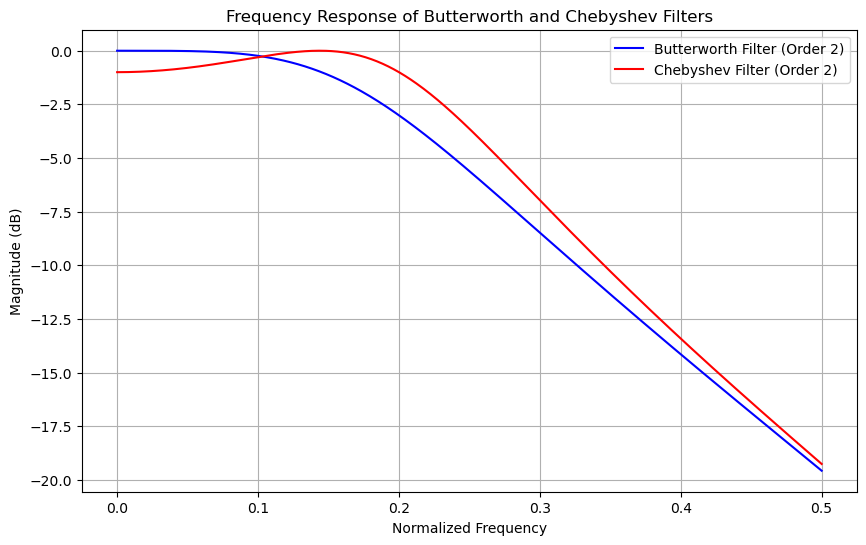

In [37]:
#4-
fc = 0.2  # Normalized cutoff frequency
n = 2     # Order of the filter
ripple = 1  # Ripple in dB
f = np.linspace(0, 0.5, 500)
def plot_filters(n):
    b_cheby, a_cheby = scipy.signal.cheby1(n, ripple, fc, btype='low', analog=False)
    w_cheby, h_cheby = freq_resp(b_cheby, a_cheby, f)

    b, a = scipy.signal.butter(n, fc, btype='low', analog=False)
    w_butter, h_butter = freq_resp(b, a, f)


    plt.figure(figsize=(10, 6))
    plt.plot(f, 20 * np.log10(np.abs(h_butter)), label=f'Butterworth Filter (Order {n})', color='blue')
    plt.plot(f, 20 * np.log10(np.abs(h_cheby)), label=f'Chebyshev Filter (Order {n})', color='red')
    plt.title('Frequency Response of Butterworth and Chebyshev Filters')
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Magnitude (dB)')
    plt.grid()
    plt.legend()
    plt.show()
    
plot_filters(2)

The Chebychev filter gives a better rolloff (sharper decrease at cutoff)

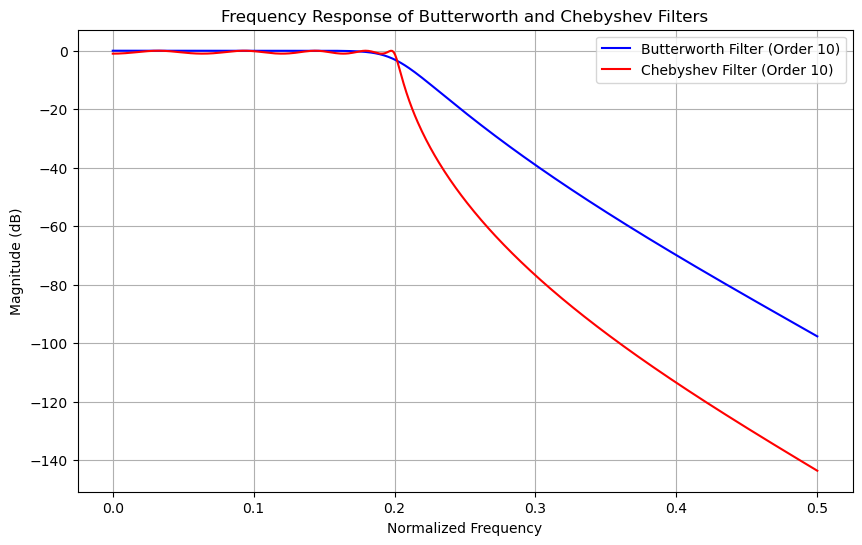

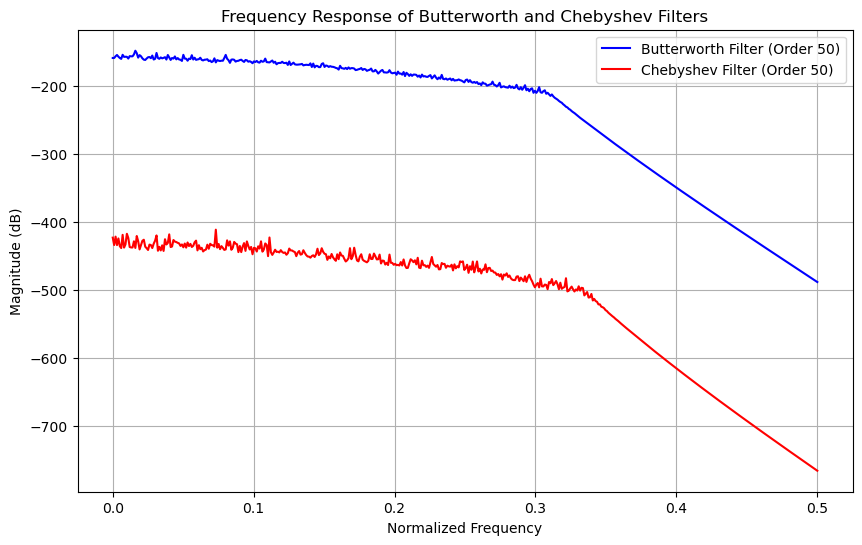

In [38]:
#5-
fc=0.2
order = [10,50]
stairway, fs = load_wav_file('stairwayb.wav')

for n in order:
    b_cheby, a_cheby = scipy.signal.cheby1(n, ripple, fc, btype='lowpass', analog=False)
    filtered_stairway_cheby = scipy.signal.lfilter(b_cheby, a_cheby, stairway)
    #scaling before saving
    filtered_stairway_cheby/= np.max(np.abs(filtered_stairway_cheby))
    scipy.io.wavfile.write(f'filtered_stairwayb_cheby_{n}.wav', fs, filtered_stairway_cheby)
    plot_filters(n)

n=10

For a Butterworth filter of order n=10:
The response remains smooth and has a gradual roll-off
For a Chebychev filter of order n=10: The response is non monotonic near the cutoff, it introduces ripples in the passband (equiripple filter)

n=50

Both filters introduce ripples in the passband, it can be due to numerical instability at high orders.

##### 3.3 Source separation and denoising

*`drum.wav`*
By applying a low pass on the drum signal to filter out the cymbal's high frequency noise we obtain a signal with clearer drum sounds and almost no cymbal can be heard. We can similarly do a high pass to eliminate the drum sounds and only keep the cymbal.

`seq.wav`For the seq audio we can seperate each of the midi notes by applying band passes around the specific frequency (for the extremes we can apply a low pass to only keep the lowest and a high pass to only keep the highest) Below is an example of a band pass filter keeping only the MIDI note m = 63 corresponding to a frequency 311.13Hz We chose a narrow band [300,320]

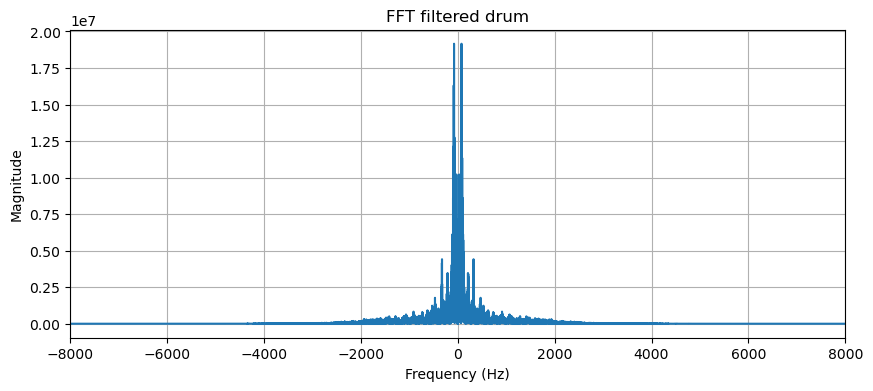

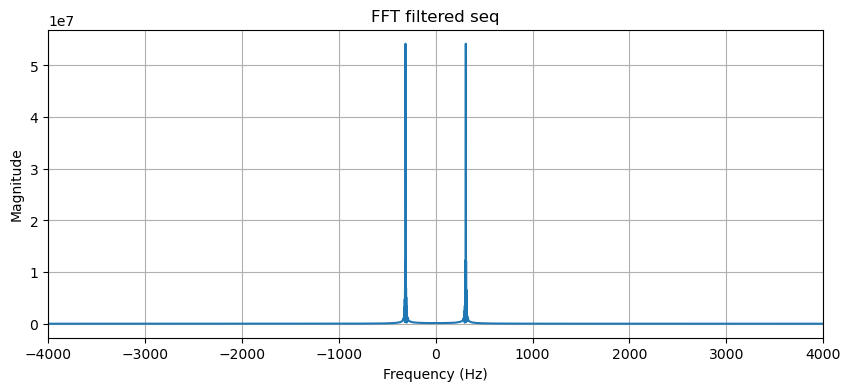

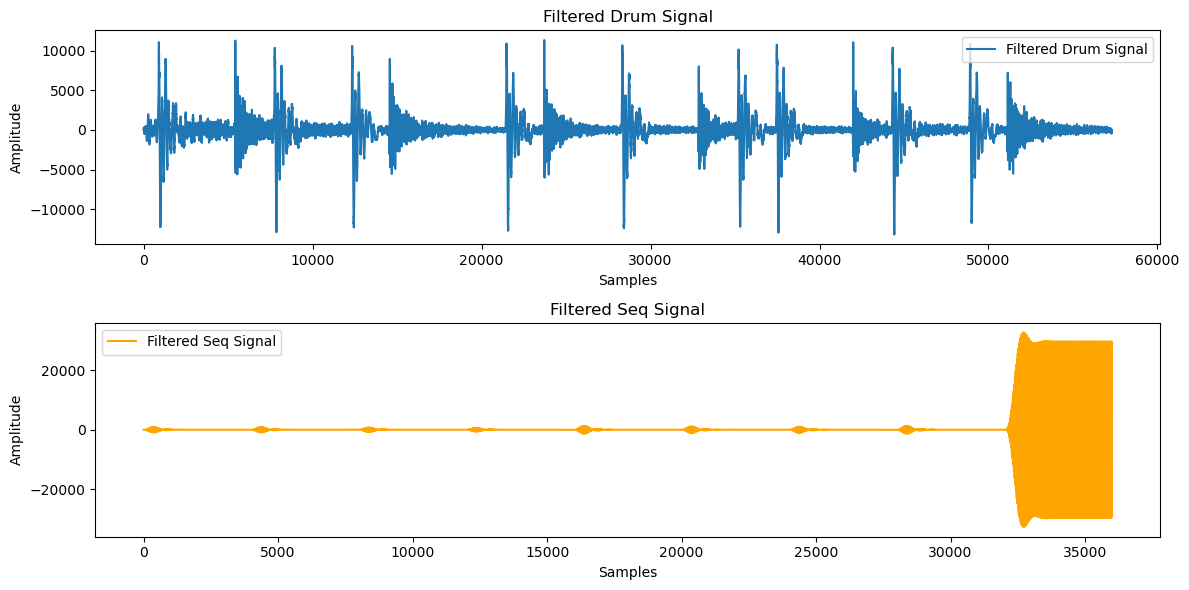

In [43]:
drum, fs_drum = load_wav_file('drum.wav')
seq, fs_seq = load_wav_file('seq.wav')

#Low-pass for drum, High-pass for seq
fc_drum = 2000  
lowcut_seq = 300 
highcut_seq = 320  

# normalized cutoff frequencies (for Butterworth filter)
Wn_drum = fc_drum / (fs_drum / 2)  # Normalized frequency for low-pass
Wn_seq = [lowcut_seq / (fs_seq / 2), highcut_seq / (fs_seq / 2)]     # Normalized frequency for high-pass

# Filter orders
order = 4

# filters
b_drum, a_drum = scipy.signal.butter(order, Wn_drum, btype='low')
b_seq, a_seq = scipy.signal.butter(order, Wn_seq, btype='band')

filtered_drum = scipy.signal.lfilter(b_drum, a_drum, drum)
filtered_seq = scipy.signal.lfilter(b_seq, a_seq, seq)
filtered_seq = filtered_seq / np.max(np.abs(filtered_seq)) * 32767

plot_fft(filtered_drum, fs_drum, 'FFT filtered drum')
plot_fft(filtered_seq, fs_seq, 'FFT filtered seq')
scipy.io.wavfile.write('filtered_drum_design.wav', fs_drum, filtered_drum.astype(np.int16))
scipy.io.wavfile.write('filtered_seq_design.wav', fs_seq, filtered_seq.astype(np.int16))

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(filtered_drum, label='Filtered Drum Signal')
plt.title('Filtered Drum Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(filtered_seq, label='Filtered Seq Signal', color='orange')
plt.title('Filtered Seq Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()


`ecg.npz` There are two sources of noise, the low near zero frequency components and the electric frequency of 60 Hz, it would be interesting to only keep the frequencies in between, especially those close to 2 that correspond to the rate of 120 hearbeats per minute. Below we apply a pass band, noticing that a band of [0.2,5] yields a clearer representation of heart rate in the temporal signal, we can see that significant hearbeat is restored at around around the midpoint of the recording.

`conso.npz` We want to see more clearly the daily and weekly periodicities of power usage. We should keep the highest frequency of both, which is the daily one. Hence we apply a low pass filter to keep the frequencies 1/80000 and 1/500000. The shape of the temporal signal is clearer and shows the days and weeks better

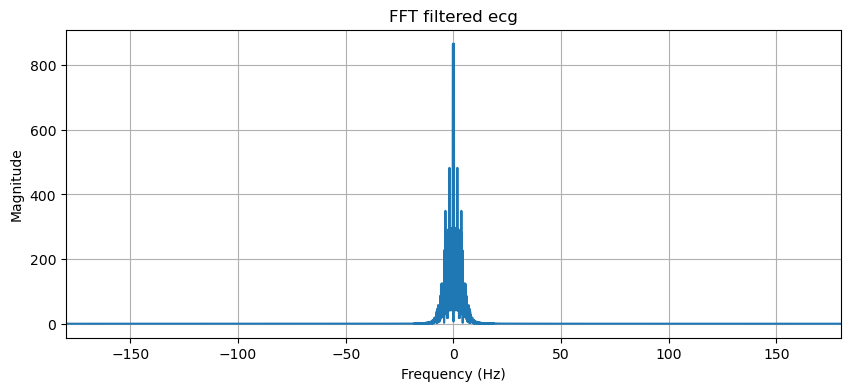

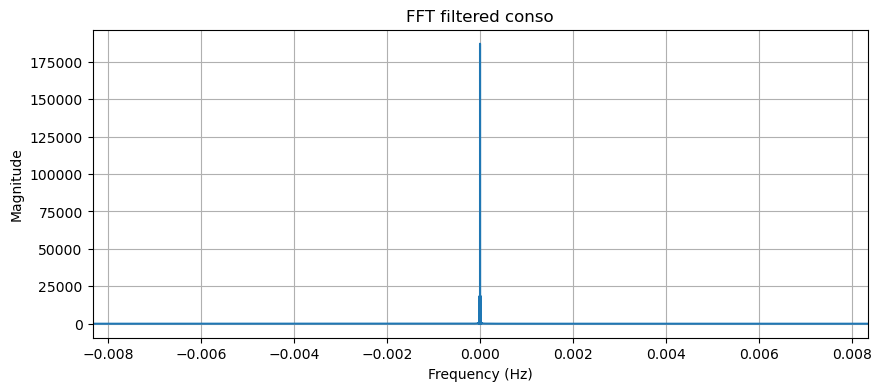

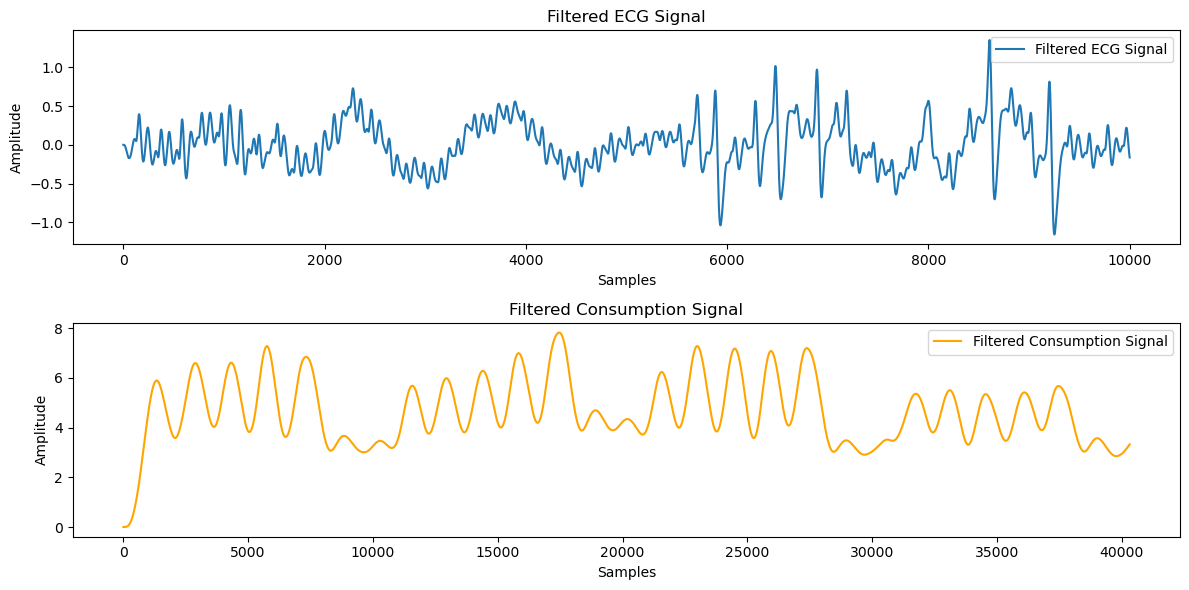

In [44]:
ecg, fs_ecg = load_npz_file('ecg.npz')
conso, fs_conso = load_npz_file('conso.npz')


# ECG: Band-pass to isolate heartbeats 
fc_ecg_low = 0.2 
fc_ecg_high = 5 

fc_conso = 1/(80000)  # Low cutoff frequency for Consumption (1 cycle per day)

#normalized cutoff frequencies (for Butterworth filter)
Wn_ecg_low = fc_ecg_low / (fs_ecg / 2)
Wn_ecg_high = fc_ecg_high / (fs_ecg / 2)
Wn_conso = fc_conso / (fs_conso / 2)

# Filter orders
order = 4

# filters
b_ecg_bandpass, a_ecg_bandpass = scipy.signal.butter(order, [Wn_ecg_low, Wn_ecg_high], btype='band')

b_conso, a_conso = scipy.signal.butter(order, Wn_conso, btype='low')

filtered_ecg = scipy.signal.lfilter(b_ecg_bandpass, a_ecg_bandpass, ecg)

filtered_conso = scipy.signal.lfilter(b_conso, a_conso, conso)

plot_fft(filtered_ecg, fs_ecg, 'FFT filtered ecg')
plot_fft(filtered_conso, fs_conso, 'FFT filtered conso')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(filtered_ecg, label='Filtered ECG Signal')
plt.title('Filtered ECG Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(filtered_conso, label='Filtered Consumption Signal', color='orange')
plt.title('Filtered Consumption Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()


#### Conclusion
